# **Veri seti hakkƒ±nda:**

- Veri Kaynaƒüƒ±: Edmunds
- Veri Formatƒ±: CSV
- Boyut: 27.000+ yorum / 137 MB
- Kapsam: Yalnƒ±zca Ford marka ara√ßlar
- URL: https://www.kaggle.com/datasets/ankkur13/edmundsconsumer-car-ratings-and-reviews

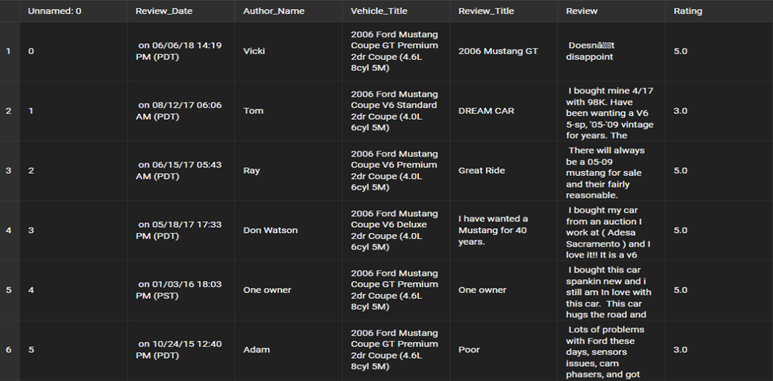

# **Zipf Yasasƒ± Analizi**

**Zipf Yasasƒ± ‚Äì Adƒ±mlar:**

1. Review s√ºtunundaki t√ºm yorumlarƒ± birle≈ütir.

2. K√º√ß√ºk harfe √ßevir, noktalama i≈üaretlerini temizle.

3. Kelimelere ayƒ±r (tokenization).

4. Kelime frekanslarƒ±nƒ± hesapla.

5. Sƒ±ralayƒ±p log-log grafiƒüini √ßiz.

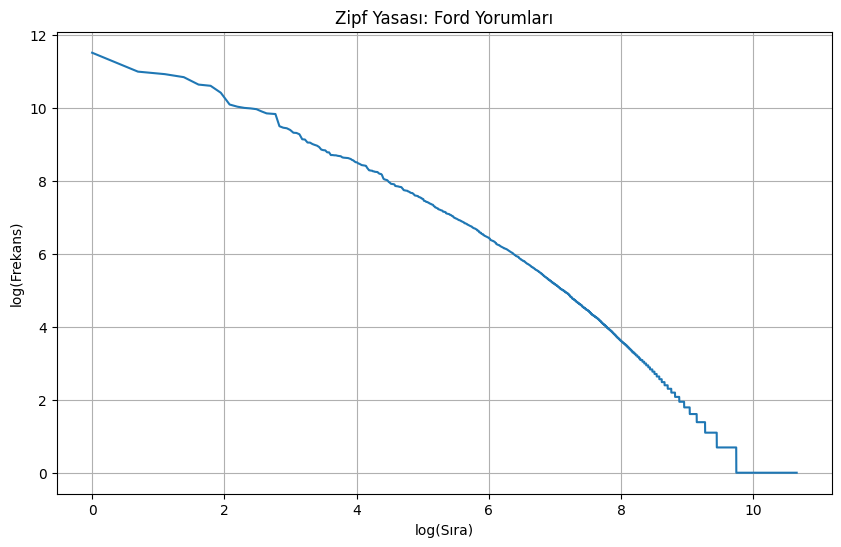

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

# Veriyi oku (gerekirse senin y√ºklediƒüin yoldan al)
df = pd.read_csv("ford.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# 1. Yorumlarƒ± birle≈ütir
all_text = " ".join(str(x) for x in df["Review"].dropna())

# 2. K√º√ß√ºk harfe √ßevir ve noktalama temizliƒüi
all_text = all_text.lower()
all_text = re.sub(r'[^\w\s]', '', all_text)  # noktalama i≈üaretlerini sil

# 3. Tokenize (kelimelere ayƒ±r)
tokens = all_text.split()

# 4. Kelime frekanslarƒ±nƒ± hesapla
word_counts = Counter(tokens)
most_common = word_counts.most_common()

# 5. Sƒ±ralƒ± frekanslarƒ± al
ranks = range(1, len(most_common)+1)
frequencies = [freq for word, freq in most_common]

# 6. Log-log grafiƒüi √ßiz
plt.figure(figsize=(10, 6))
plt.plot(np.log(ranks), np.log(frequencies))
plt.title("Zipf Yasasƒ±: Ford Yorumlarƒ±")
plt.xlabel("log(Sƒ±ra)")
plt.ylabel("log(Frekans)")
plt.grid(True)
plt.show()


**Grafikte Zipf yasasƒ±na uygun bir eƒüri elde ettik (yani log-log ekseninde a≈üaƒüƒ± eƒüimli doƒürusal bir yapƒ± var)
 bu da bizlere yorum verilerinin yeterli ve doƒüru olduƒüunu g√∂steriyor.**

# **√ñn ƒ∞≈üleme (Pre-processing) A≈üamalarƒ±**
1. **Stop Word Removal:**

Bu adƒ±mda, anlam ta≈üƒ±mayan ya da √ßok sƒ±k ge√ßen kelimeler (√∂rn. "the", "is", "and", "but") yorumlardan √ßƒ±karƒ±lƒ±r. Review_NoStop adlƒ± yeni bir s√ºtun olu≈ütu. Bu s√ºtun stop words √ßƒ±karƒ±lmƒ±≈ü hali i√ßermektedir.

Kullanƒ±lan ara√ßlar ve k√ºt√ºphaneler:

pandas: Veri setini okuma ve DataFrame i≈ülemleri i√ßin kullanƒ±ldƒ±.

re: Regular expressions (d√ºzenli ifadeler) yardƒ±mƒ±yla noktalama ve √∂zel karakterleri temizlemek i√ßin kullanƒ±ldƒ±.

nltk: Doƒüal dil i≈üleme i√ßin kullanƒ±ldƒ±. √ñzellikle:
stopwords (sƒ±k ge√ßen kelime listesi)
word_tokenize (kelimeye ayƒ±rmak i√ßin)

Kullanƒ±lan NLTK Alt Mod√ºlleri:

nltk.download('punkt'): Tokenizer i√ßin.

nltk.download('stopwords'): ƒ∞ngilizce sƒ±k kullanƒ±lan kelimeler listesini indirmek i√ßin.

Kodun ƒ∞≈ülevi ve A√ßƒ±klamasƒ±:

Kod, Review s√ºtunundaki her bir yorum i√ßin ≈üu i≈ülemleri uygular:

K√º√ß√ºk harfe √ßevirme
√ñrn: "I LOVE this car" ‚Üí "i love this car"

Noktalama i≈üaretlerini temizleme
√ñrn: "love this car!" ‚Üí "love this car"

Kelimelere ayƒ±rma (Tokenization)
√ñrn: "love this car" ‚Üí ['love', 'this', 'car']

Stopword √ßƒ±karƒ±mƒ±
NLTK'nƒ±n ƒ∞ngilizce listesi kullanƒ±larak:
√ñrn: ['love', 'this', 'car'] ‚Üí ['love', 'car']
(this kelimesi √ßƒ±karƒ±lƒ±r √ß√ºnk√º sƒ±k kullanƒ±lan anlamsƒ±z kelimedir)

Sonu√ß tekrar string'e √ßevrilir ve Review_NoStop adlƒ± yeni bir s√ºtuna yazƒ±lƒ±r.

Review_NoStop s√ºtunu, bir sonraki adƒ±m olan tokenization, lemmatization ve vekt√∂rle≈ütirme (TF-IDF / Word2Vec) i≈ülemleri i√ßin hazƒ±r h√¢le getirilmi≈ü yorumlarƒ± i√ßerir.

Bu sayede model sadece anlamlƒ± ve bilgi ta≈üƒ±yan kelimeleri kullanƒ±r, eƒüitim kalitesi artar.


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Gerekli NLTK dosyalarƒ±nƒ± indir
nltk.download('punkt')
nltk.download('stopwords')

# Veriyi oku
df = pd.read_csv("ford.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Stop words listesi (ƒ∞ngilizce)
stop_words = set(stopwords.words('english'))

# Stop word removal fonksiyonu
def remove_stopwords(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

# Yeni s√ºtunu ekle
df["Review_NoStop"] = df["Review"].apply(remove_stopwords)

# Dosyayƒ± aynƒ± isimle √ºzerine yaz
df.to_csv("ford.csv", index=False)

# ƒ∞lk 5 satƒ±rƒ± g√∂ster (kontrol)
df[["Review", "Review_NoStop"]].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Review  \
0                               Doesn√¢¬Ä¬ôt disappoint   
1   I bought mine 4/17 with 98K. Have been wantin...   
2   There will always be a 05-09 mustang for sale...   
3   I bought my car from an auction I work at ( A...   
4   I bought this car spankin new and i still am ...   

                                       Review_NoStop  
0                                 doesn√¢t disappoint  
1  bought mine 417 98k wanting v6 5sp 0509 vintag...  
2  always 0509 mustang sale fairly reasonable pur...  
3  bought car auction work adesa sacramento love ...  
4  bought car spankin new still love car car hugs...

# **√ñn ƒ∞≈üleme (Pre-processing) A≈üamalarƒ±**

2. **Tokenization:**

Bu adƒ±mda metinler tek tek kelimelere ayrƒ±lƒ±r (token) ve bu i≈ülem sƒ±rasƒ±nda noktalama i≈üaretleri de temizlenir.

Bu i≈ülemin sonucunda her yorum bir listeye d√∂n√º≈üm√º≈üt√ºr: ["i", "bought", "this", "car", "new", "and", "still", "love", "it"]

Bu liste, lemmatization ve stemming adƒ±mlarƒ± i√ßin temel veri olacak.

Kullanƒ±lan Ara√ßlar ve K√ºt√ºphaneler:

pandas: CSV dosyasƒ±nƒ± okuyup yazmak ve s√ºtunlarƒ± d√ºzenlemek i√ßin kullanƒ±lmƒ±≈ütƒ±r.

re: Noktalama i≈üaretlerini temizlemek i√ßin kullanƒ±lan regular expression mod√ºl√ºd√ºr. Python'un standart k√ºt√ºphanesidir.

Kodun ƒ∞≈ülevi ‚Äì A√ßƒ±klamalƒ± Adƒ±mlar:

Kod, Review_NoStop s√ºtunundaki her yorumu i≈üleyerek ≈üu adƒ±mlarƒ± uygular:

K√º√ß√ºk harfe √ßevirme
√ñrn: "FAST car" ‚Üí "fast car"

Noktalama temizliƒüi
√ñrn: "fast, car!" ‚Üí "fast car"

Bo≈üluklara g√∂re kelimelere ayƒ±rma (tokenization)
√ñrn: "fast car" ‚Üí ["fast", "car"]

Sonu√ß, Tokens adlƒ± yeni s√ºtun olarak DataFrame‚Äôe eklenir.

Not:
Tokenization i≈ülemi basit split() fonksiyonu ile yapƒ±lmƒ±≈ütƒ±r. Bu, hƒ±zlƒ± ve temel bir y√∂ntemdir.
Daha geli≈ümi≈ü tokenization i√ßin nltk.word_tokenize() veya spacy gibi k√ºt√ºphaneler kullanƒ±labilir, ancak bu √∂rnekte gereksiz karma≈üƒ±klƒ±k olmadan i≈ülem yapƒ±lmƒ±≈ütƒ±r.

Ama√ß ve Kullanƒ±m:

Bu i≈ülemle her yorum artƒ±k bir kelime listesi haline gelir.
Bu listeler, lemmatization, stemming, TF-IDF, Word2Vec gibi sonraki adƒ±mlar i√ßin doƒürudan kullanƒ±labilir hale getirilmi≈ütir.
Ayrƒ±ca, Zipf Yasasƒ± gibi kelime sƒ±klƒ±ƒüƒ± analizleri i√ßin de ham madde g√∂revini g√∂r√ºr.

In [ ]:
import pandas as pd
import re

# Veriyi oku
df = pd.read_csv("ford.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Tokenization fonksiyonu
def tokenize(text):
    if pd.isnull(text):
        return []
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama temizliƒüi
    tokens = text.split()
    return tokens

# Token s√ºtununu olu≈ütur
df["Tokens"] = df["Review_NoStop"].apply(tokenize)

# Dosyayƒ± tekrar kaydet (√ºzerine yaz)
df.to_csv("ford.csv", index=False)

# √ñrnek kontrol
df[["Review_NoStop", "Tokens"]].head()


Review_NoStop  \
0                                doesn√É¬¢t disappoint   
1  bought mine 417 98k wanting v6 5sp 0509 vintag...   
2  always 0509 mustang sale fairly reasonable pur...   
3  bought car auction work adesa sacramento love ...   
4  bought car spankin new still love car car hugs...   

                                              Tokens  
0                              [doesn√£t, disappoint]  
1  [bought, mine, 417, 98k, wanting, v6, 5sp, 050...  
2  [always, 0509, mustang, sale, fairly, reasonab...  
3  [bought, car, auction, work, adesa, sacramento...  
4  [bought, car, spankin, new, still, love, car, ...

# **√ñn ƒ∞≈üleme (Pre-processing) A≈üamalarƒ±**

3. **Lowercasing:**

"Tokens" s√ºtununu olu≈ütururken lower() i≈ülemini zaten uyguladƒ±m. Ama √∂devde her adƒ±mƒ±n ayrƒ±ca ve a√ßƒ±k ≈üekilde g√∂sterilmesi istendiƒüi i√ßin lowercasing adƒ±mƒ±nƒ± da ayrƒ± bir s√ºtunla (Tokens_Lower) kaydettim. Bu adƒ±mƒ± ger√ßekle≈ütirirken "ast.literal_eval" kullandƒ±m. √á√ºnk√º:
CSV‚Äôye liste olarak yazƒ±lmasƒ± gereken
 s√ºtunlar (['i', 'love', 'this', 'car']) bazen string olarak okunmaktadƒ±r. "ast.literal_eval()" onlarƒ± tekrar liste haline √ßevirir.

 Kullanƒ±lan Ara√ßlar ve K√ºt√ºphaneler:

 ast(abstract syntax trees): CSV okunduƒüunda "['This', 'Car']" gibi string haline gelen liste verilerini tekrar ger√ßek Python listesine √ßevirmek i√ßin kullanƒ±lmƒ±≈ütƒ±r. Bu sayede her kelimeye ayrƒ± ayrƒ± eri≈üim m√ºmk√ºn olur.

 Kodun ƒ∞≈ülevi ‚Äì A√ßƒ±klamalƒ± Adƒ±mlar:

Kodun amacƒ±, Tokens s√ºtunundaki her kelime listesindeki kelimeleri k√º√ß√ºk harfe √ßevirmektir:
Tokens s√ºtunu "['This', 'Car']" gibi stringle≈ümi≈ü liste olarak okunabilir.
Bu durumda ast.literal_eval() ile tekrar liste formatƒ±na √ßevrilir.
Her kelime .lower() ile k√º√ß√ºk harfe d√∂n√º≈üt√ºr√ºl√ºr.
Sonu√ß olarak Tokens_Lower adƒ±nda yeni bir s√ºtun olu≈üturulur ve t√ºm kelimeler k√º√ß√ºk harfli olur.G√ºncellenen DataFrame ford.csv dosyasƒ±na kalƒ±cƒ± olarak kaydedilir.

Bu Adƒ±mƒ±n √ñnemi:
Doƒüal dil i≈üleme algoritmalarƒ± (TF-IDF, Word2Vec, LDA vb.) b√ºy√ºk/k√º√ß√ºk harf ayrƒ±mƒ± yapmaz.
"Car" ve "car" ayrƒ± kelime olarak i≈ülenmemelidir. Bu y√ºzden t√ºm kelimelerin k√º√ß√ºk harfe √ßevrilmesi gerekir.
Bu adƒ±m, veri standardizasyonu i√ßin √ßok kritik bir adƒ±mdƒ±r.

In [ ]:
import pandas as pd

# Veriyi oku
df = pd.read_csv("ford.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# 'Tokens' s√ºtunundaki her kelimeyi k√º√ß√ºk harfe √ßevir
def lowercase_tokens(token_list):
    if isinstance(token_list, str):
        # Liste string olarak gelmi≈ü olabilir ‚Üí d√∂n√º≈üt√ºr
        import ast
        token_list = ast.literal_eval(token_list)
    return [token.lower() for token in token_list]

# Yeni s√ºtunu olu≈ütur
df["Tokens_Lower"] = df["Tokens"].apply(lowercase_tokens)

# G√ºncel dosyaya yaz
df.to_csv("ford.csv", index=False)

# Kontrol
df[["Tokens", "Tokens_Lower"]].head()


Tokens  \
0                         ['doesn√É¬£t', 'disappoint']   
1  ['bought', 'mine', '417', '98k', 'wanting', 'v...   
2  ['always', '0509', 'mustang', 'sale', 'fairly'...   
3  ['bought', 'car', 'auction', 'work', 'adesa', ...   
4  ['bought', 'car', 'spankin', 'new', 'still', '...   

                                        Tokens_Lower  
0                             [doesn√£¬£t, disappoint]  
1  [bought, mine, 417, 98k, wanting, v6, 5sp, 050...  
2  [always, 0509, mustang, sale, fairly, reasonab...  
3  [bought, car, auction, work, adesa, sacramento...  
4  [bought, car, spankin, new, still, love, car, ...

# **√ñn ƒ∞≈üleme (Pre-processing) A≈üamalarƒ±**

4. **Lemmatization:**

Bu adƒ±mda her kelime, k√∂k (s√∂zl√ºkteki) h√¢line d√∂n√º≈üt√ºr√ºl√ºr.
√ñrneƒüin: "cars" ‚Üí "car", "running" ‚Üí "run" gibi.

Kullanƒ±lan Ara√ßlar ve K√ºt√ºphaneler:

nltk.stem.WordNetLemmatizer: ƒ∞ngilizce kelimeleri k√∂k (s√∂zl√ºkteki ger√ßek) h√¢line indirmek i√ßin kullanƒ±lƒ±r. Daha doƒüru ve dilbilgisel a√ßƒ±dan anlamlƒ± d√∂n√º≈ü√ºm saƒülar.

nltk.download('wordnet'), nltk.download('omw-1.4'): Lemmatizer'ƒ±n doƒüru √ßalƒ±≈ümasƒ± i√ßin gerekli olan s√∂zl√ºk verilerini indirir.

ast.literal_eval: CSV‚Äôden okunan string formatƒ±ndaki liste verisini tekrar Python listesi h√¢line d√∂n√º≈üt√ºrmek i√ßin kullanƒ±lƒ±r.

Kodun ƒ∞≈ülevi ‚Äì A√ßƒ±klamalƒ± Adƒ±mlar:

Veri Okuma:
ford.csv dosyasƒ±ndan veri okunur.
Liste Formatƒ± Kontrol√º:
Tokens_Lower s√ºtunu CSV‚Äôden string olarak gelmi≈üse ast.literal_eval() ile ger√ßek listeye √ßevrilir.
Lemmatization:
Her kelime i√ßin lemmatizer.lemmatize(token) uygulanarak k√∂k h√¢line getirilir.
√ñrn: "cars" ‚Üí "car", "driving" ‚Üí "driving" (bazƒ± fiillerin h√¢li deƒüi≈ümeyebilir √ß√ºnk√º context bilinmiyor)
Yeni S√ºtun:
Sonu√ß, Tokens_Lemmatized adlƒ± yeni bir s√ºtuna yazƒ±lƒ±r.
Dosya Kaydƒ±:
G√ºncellenmi≈ü DataFrame, ford.csv dosyasƒ±na tekrar yazƒ±lƒ±r.

Bu Adƒ±mƒ±n √ñnemi:
Modelin daha anlamlƒ± kelime temsilleri √∂ƒürenmesini saƒülar.
Aynƒ± anlamƒ± ta≈üƒ±yan farklƒ± kelime bi√ßimlerinin (cars, car, driving, drive) tekille≈ütirilmesini saƒülar.
TF-IDF ve Word2Vec gibi modellerde tekrar eden anlamlƒ± kelimeler daha etkili yakalanƒ±r.


In [ ]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
import nltk
import ast

# Gerekli nltk bile≈üenlerini indir
nltk.download('wordnet')
nltk.download('omw-1.4')

# Veriyi oku
df = pd.read_csv("ford.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Lemmatizer nesnesi
lemmatizer = WordNetLemmatizer()

# Lemmatization fonksiyonu
def lemmatize_tokens(tokens):
    if isinstance(tokens, str):
        tokens = ast.literal_eval(tokens)
    return [lemmatizer.lemmatize(token) for token in tokens]

# Yeni s√ºtunu olu≈ütur
df["Tokens_Lemmatized"] = df["Tokens_Lower"].apply(lemmatize_tokens)

# Dosyayƒ± kaydet
df.to_csv("ford.csv", index=False)

# Kontrol i√ßin g√∂ster
df[["Tokens_Lower", "Tokens_Lemmatized"]].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Tokens_Lower  \
0           ['doesn√É¬É√Ç¬É√É¬Ç√Ç¬£√É¬É√Ç¬Ç√É¬Ç√Ç¬£t', 'disappoint']   
1  ['bought', 'mine', '417', '98k', 'wanting', 'v...   
2  ['always', '0509', 'mustang', 'sale', 'fairly'...   
3  ['bought', 'car', 'auction', 'work', 'adesa', ...   
4  ['bought', 'car', 'spankin', 'new', 'still', '...   

                                   Tokens_Lemmatized  
0               [doesn√É¬É√Ç¬É√É¬Ç√Ç¬£√É¬É√Ç¬Ç√É¬Ç√Ç¬£t, disappoint]  
1  [bought, mine, 417, 98k, wanting, v6, 5sp, 050...  
2  [always, 0509, mustang, sale, fairly, reasonab...  
3  [bought, car, auction, work, adesa, sacramento...  
4  [bought, car, spankin, new, still, love, car, ...

# **√ñn ƒ∞≈üleme (Pre-processing) A≈üamalarƒ±**

5. **Stemming:**

Bu adƒ±mda kelimeler, daha kaba bir ≈üekilde k√∂klerine indirgenmi≈ütir.
√ñrneƒüin: "driving" ‚Üí "driv", "better" ‚Üí "better".

Kullanƒ±lan Ara√ßlar ve K√ºt√ºphaneler:

nltk.stem.PorterStemmer: ƒ∞ngilizce kelimeleri hƒ±zlƒ± ve kurallƒ± bir bi√ßimde k√∂klerine indirmek i√ßin kullanƒ±lƒ±r. √áok yaygƒ±n ve basit bir stemming algoritmasƒ±dƒ±r.

ast.literal_eval: CSV‚Äôden okunan liste formatƒ±ndaki veriler ("['car', 'fast']") aslƒ±nda string‚Äôdir. Bu string ifadeyi tekrar ger√ßek Python listesine √ßevirmek i√ßin kullanƒ±lƒ±r.

Kodun ƒ∞≈ülevi ‚Äì A√ßƒ±klamalƒ± Adƒ±mlar:
CSV‚Äôden veri okunur.
Tokens_Lower s√ºtunundaki her satƒ±r, √∂nce ast.literal_eval() ile liste haline getirilir (eƒüer string ise).
Stemming i≈ülemi yapƒ±lƒ±r:
Her kelime i√ßin stemmer.stem(token) uygulanƒ±r. Bu i≈ülem, kelimenin son eklerini keserek kƒ±sa bir k√∂ke d√∂n√º≈üt√ºr√ºr.
Sonu√ß, Tokens_Stemmed adlƒ± yeni bir s√ºtuna yazƒ±lƒ±r.
G√ºncellenmi≈ü DataFrame, aynƒ± isimle (ford.csv) kaydedilir.

Bu Adƒ±mƒ±n √ñnemi:
NLP'de bazƒ± durumlarda lemmatization fazla yava≈ü olabilir, stemming ise hƒ±zlƒ± ve genellikle yeterlidir.
√ñzellikle b√ºy√ºk veri k√ºmelerinde daha d√º≈ü√ºk i≈ülem maliyeti saƒülar.
Ancak anlamsal doƒüruluk kaybƒ± riski olduƒüu i√ßin dikkatli kullanƒ±lmasƒ± gerekir.

Lemmatization daha anlamlƒ± sonu√ßlar vermi≈üken, stemming daha mekanik ve hƒ±zlƒ±dƒ±r.

In [ ]:
import pandas as pd
from nltk.stem import PorterStemmer
import ast

# Veriyi oku
df = pd.read_csv("ford.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Stemmer nesnesi
stemmer = PorterStemmer()

# Stemming fonksiyonu
def stem_tokens(tokens):
    if isinstance(tokens, str):
        tokens = ast.literal_eval(tokens)
    return [stemmer.stem(token) for token in tokens]

# Yeni s√ºtun olu≈ütur
df["Tokens_Stemmed"] = df["Tokens_Lower"].apply(stem_tokens)

# Dosyayƒ± kaydet
df.to_csv("ford.csv", index=False)

# Kontrol i√ßin g√∂ster
df[["Tokens_Lower", "Tokens_Stemmed"]].head()


Tokens_Lower  \
0  ['doesn√É¬É√Ç¬É√É¬Ç√Ç¬É√É¬É√Ç¬Ç√É¬Ç√Ç¬£√É¬É√Ç¬É√É¬Ç√Ç¬Ç√É¬É√Ç¬Ç√É¬Ç√Ç¬£t', 'di...   
1  ['bought', 'mine', '417', '98k', 'wanting', 'v...   
2  ['always', '0509', 'mustang', 'sale', 'fairly'...   
3  ['bought', 'car', 'auction', 'work', 'adesa', ...   
4  ['bought', 'car', 'spankin', 'new', 'still', '...   

                                      Tokens_Stemmed  
0  [doesn√£¬É√¢¬É√£¬Ç√¢¬É√£¬É√¢¬Ç√£¬Ç√¢¬£√£¬É√¢¬É√£¬Ç√¢¬Ç√£¬É√¢¬Ç√£¬Ç√¢¬£t, disap...  
1  [bought, mine, 417, 98k, want, v6, 5sp, 0509, ...  
2  [alway, 0509, mustang, sale, fairli, reason, p...  
3  [bought, car, auction, work, adesa, sacramento...  
4  [bought, car, spankin, new, still, love, car, ...

# **Temizlenmi≈ü Veri Seti √áƒ±ktƒ±larƒ±**

"fordlemmatized.csv" veri setinde Zipf Grafiƒüinin √ßizimi:

G√∂zlemler:

Grafik, log(sƒ±ra) ile log(frekans) arasƒ±nda yakla≈üƒ±k doƒürusal bir ili≈üki g√∂steriyor.
En sƒ±k ge√ßen birka√ß kelime √ßok y√ºksek frekansta, geri kalan kelimeler hƒ±zla d√º≈üen sƒ±klƒ±ƒüa sahip.
Eƒürinin sonlarƒ±nda ani d√º≈ü√º≈üler var, bu da nadir kelimelerin √ßok fazla olduƒüunu g√∂steriyor.

Yorum:

Lemmatization uygulandƒ±ƒüƒ± i√ßin benzer anlam ta≈üƒ±yan kelimeler tek k√∂kte birle≈ümi≈ü:
√ñrn. "cars", "car" ‚Üí "car"
Bu, veri tekrarƒ±nƒ± azaltmƒ±≈ü ve daha dengeli bir daƒüƒ±lƒ±m olu≈üturmu≈ü.
Zipf yasasƒ±na uygunluk √ßok y√ºksek; bu, metnin doƒüal dil verisi olduƒüunu ve dilin yapƒ±sal √∂zelliklerini ta≈üƒ±dƒ±ƒüƒ±nƒ± g√∂sterir.

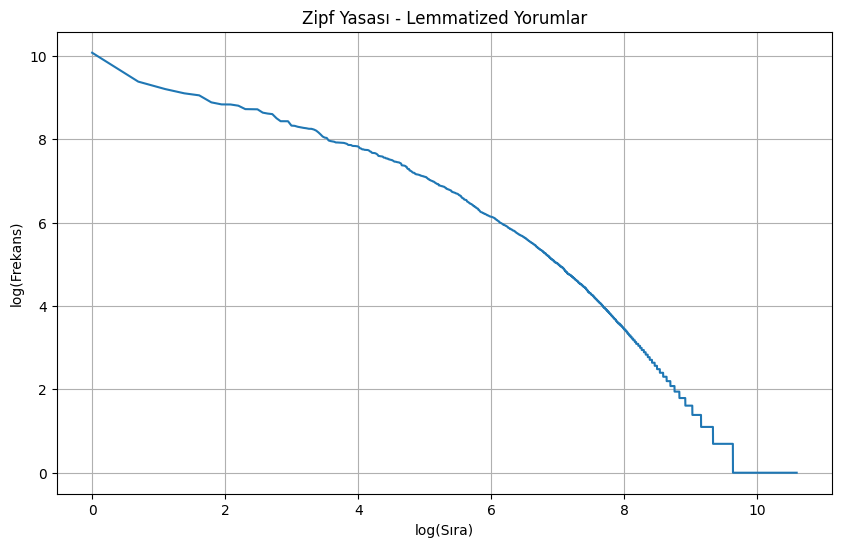

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import ast

# Veriyi oku
df = pd.read_csv("fordlemmatized.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# String olarak okunmu≈ü listeyi ger√ßek listeye d√∂n√º≈üt√ºr
all_tokens = []

for row in df["Tokens_Lemmatized"].dropna():
    if isinstance(row, str):
        try:
            tokens = ast.literal_eval(row)
            all_tokens.extend(tokens)
        except:
            continue

# Kelime frekanslarƒ±nƒ± say
word_freq = Counter(all_tokens)
sorted_freq = word_freq.most_common()

# Sƒ±ralarƒ± ve frekanslarƒ± √ßƒ±kar
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = [freq for word, freq in sorted_freq]

# Zipf yasasƒ± log-log grafiƒüi
plt.figure(figsize=(10, 6))
plt.plot(np.log(ranks), np.log(frequencies))
plt.title("Zipf Yasasƒ± - Lemmatized Yorumlar")
plt.xlabel("log(Sƒ±ra)")
plt.ylabel("log(Frekans)")
plt.grid(True)
plt.show()


# **Temizlenmi≈ü Veri Seti √áƒ±ktƒ±larƒ±**

"fordstemmed.csv" veri setinde Zipf Grafiƒüinin √ßizimi:

G√∂zlemler:

Daƒüƒ±lƒ±m eƒürisi √ßok benzer, fakat eƒüri biraz daha daha dik.
Bu, stemming'in bazƒ± kelimeleri anlamsƒ±z veya yapay k√∂klere indirgediƒüini g√∂steriyor (√∂rn. "driving" ‚Üí "driv").
Son kƒ±sƒ±mlarda daha fazla zigzag var, bu da kelime √ße≈üitliliƒüinin artmasƒ±na ve bazƒ± anlamsƒ±z k√∂klerin t√ºremesine i≈üaret ediyor.

Yorum:

Stemming i≈ülemi lemmatization‚Äôa g√∂re daha agresif olduƒüu i√ßin bazƒ± yapay kelime k√∂kleri olu≈ümu≈ü.
Zipf yasasƒ±na uygunluk yine var, ancak lezzetli bir doƒüruluk yerine biraz daha bozuk ve kƒ±rpƒ±lmƒ±≈ü bir daƒüƒ±lƒ±m g√∂r√ºyoruz.
Bu y√∂ntem, i≈ülem s√ºresi avantajƒ± sunsa da anlamsal doƒüruluk a√ßƒ±sƒ±ndan biraz zayƒ±f kalƒ±r.

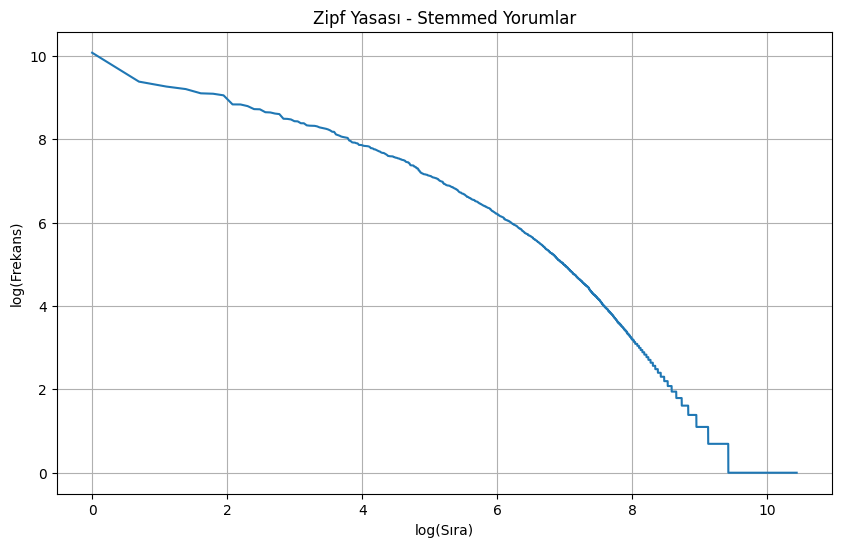

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import ast

# Veriyi oku
df = pd.read_csv("fordstemmed.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token listelerini birle≈ütir
all_tokens = []

for row in df["Tokens_Stemmed"].dropna():
    if isinstance(row, str):
        try:
            tokens = ast.literal_eval(row)
            all_tokens.extend(tokens)
        except:
            continue

# Kelime frekanslarƒ±nƒ± say
word_freq = Counter(all_tokens)
sorted_freq = word_freq.most_common()

# Sƒ±ralarƒ± ve frekanslarƒ± √ßƒ±kar
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = [freq for word, freq in sorted_freq]

# Zipf log-log grafiƒüini √ßiz
plt.figure(figsize=(10, 6))
plt.plot(np.log(ranks), np.log(frequencies))
plt.title("Zipf Yasasƒ± - Stemmed Yorumlar")
plt.xlabel("log(Sƒ±ra)")
plt.ylabel("log(Frekans)")
plt.grid(True)
plt.show()


**√ñZELLƒ∞K KAR≈ûILA≈ûTIRILMASI:**

| √ñzellik            | Lemmatized                 | Stemmed                  |
| ------------------ | -------------------------- | ------------------------ |
| Zipf eƒürisi yapƒ±sƒ± | Daha d√ºzg√ºn, anlamlƒ±       | Daha kƒ±rƒ±k, agresif      |
| Dil doƒüallƒ±ƒüƒ±      | Daha y√ºksek                | Daha d√º≈ü√ºk               |
| Yapay k√∂k riski    | Yok (s√∂zl√ºk tabanlƒ±)       | Var                      |
| Uygunluk           | Zipf'e √ßok iyi uyum saƒülar | Zipf'e genel olarak uyar |

----------------------------------------------------------------------

**YENƒ∞ VERƒ∞ BOYUTLARI:**

ford.csv --> 12,5 MB

fordlemmatized.csv --> 46,4 MB

fordstemmed.csv --> 46,2 MB

----------------------------------------------------------------------

**!!√ñNEMLƒ∞ UYARI!!**

"fordlemmatized.csv" ve "fordstemmed.csv" dosyalarƒ±nda Pre-processing a≈üamalarƒ±nda s√ºtun eklendiƒüi i√ßin ham dosya boyutundan b√ºy√ºk hale gelmi≈ülerdir.

# **Vekt√∂rle≈ütirme**

### **TF-IDF Vekt√∂rle≈ütirme:**

**"fordlemmatized.csv" dosyasƒ± i√ßin TF-IDF Vekt√∂rleme ƒ∞≈ülemi:**

| √ñzellik      | A√ßƒ±klama                                                                                                                                                                                                    |
| ------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Satƒ±rlar** | `26,791` adet kullanƒ±cƒ± yorumu (lemmatized halde)                                                                                                                                                           |
| **S√ºtunlar** | `1000` adet kelime ‚Äì TF-IDF deƒüeri hesaplanan en sƒ±k ge√ßen terimler                                                                                                                                         |
| **H√ºcreler** | Her bir h√ºcre, o yorumda ilgili kelimenin √∂nemini ifade eden **TF-IDF deƒüeri**dir. Bu deƒüer, kelimenin hem belge i√ßinde ne kadar sƒ±k ge√ßtiƒüini hem de t√ºm belgeler i√ßinde ne kadar √∂zg√ºn olduƒüunu g√∂sterir. |


**Yorum:**

√ñrneƒüin, 4. satƒ±rda "year" kelimesi i√ßin 0.1221 TF-IDF deƒüeri var ‚Üí Bu, bu yorumda ‚Äúyear‚Äù kelimesinin hem ge√ßtiƒüini hem de genel yorumlar arasƒ±nda √∂zg√ºn olduƒüunu g√∂sterir.

0.0 olan h√ºcreler, o kelimenin o yorumda hi√ß ge√ßmediƒüi anlamƒ±na gelir.




In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import ast

# Veriyi oku
df = pd.read_csv("fordlemmatized.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Tokens_Lemmatized s√ºtununu metne d√∂n√º≈üt√ºr
def list_to_text(token_list_str):
    try:
        tokens = ast.literal_eval(token_list_str)
        return " ".join(tokens)
    except:
        return ""

# Metinleri olu≈ütur
df["Processed_Text"] = df["Tokens_Lemmatized"].apply(list_to_text)

# TF-IDF vekt√∂rle≈ütirici (en √ßok ge√ßen 1000 kelime)
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df["Processed_Text"])

# TF-IDF DataFrame olu≈ütur
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# CSV olarak kaydet
tfidf_df.to_csv("tfidf_lemmatized.csv", index=False)

# ƒ∞lk 5 satƒ±rƒ± kontrol
tfidf_df.head()


04   05   06   07   08   10  100  1000  10000  100000  ...  wow  wrong  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...  0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...  0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...  0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...  0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...  0.0    0.0   

   xlt      year  yes  yet  youll  youre   yr  zero  
0  0.0  0.000000  0.0  0.0    0.0    0.0  0.0   0.0  
1  0.0  0.086621  0.0  0.0    0.0    0.0  0.0   0.0  
2  0.0  0.000000  0.0  0.0    0.0    0.0  0.0   0.0  
3  0.0  0.000000  0.0  0.0    0.0    0.0  0.0   0.0  
4  0.0  0.122128  0.0  0.0    0.0    0.0  0.0   0.0  

[5 rows x 1000 columns]

# **Vekt√∂rle≈ütirme**

### **TF-IDF Vekt√∂rle≈ütirme:**

**"fordstemmed.csv" dosyasƒ± i√ßin TF-IDF Vekt√∂rleme ƒ∞≈ülemi:**

| √ñzellik         | Deƒüer / A√ßƒ±klama                                 |
| --------------- | ------------------------------------------------ |
| Satƒ±r Sayƒ±sƒ± | 26,791 yorum ‚Üí her satƒ±r bir belge/c√ºmle         |
| S√ºtun Sayƒ±sƒ± | 1000 kelime (en sƒ±k ge√ßen 1000 terim)            |
| H√ºcre Deƒüeri | TF-IDF deƒüeri (kelimenin yorumdaki g√∂reli √∂nemi) |

ƒ∞lk 1000 en sƒ±k ge√ßen kelime vekt√∂r olarak yer alƒ±r. √ñrneƒüin:
"drive", "engin", "mileage", "perform", "safe" gibi stem‚Äôlenmi≈ü kelimeler.

| year | perform | good | engine | drive |
| ---- | ------- | ---- | ------ | ----- |
| 0.12 | 0.08    | 0.00 | 0.03   | 0.10  |





In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import ast

# Veriyi oku
df = pd.read_csv("fordstemmed.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Tokens_Stemmed s√ºtununu metne d√∂n√º≈üt√ºr
def list_to_text(token_list_str):
    try:
        tokens = ast.literal_eval(token_list_str)
        return " ".join(tokens)
    except:
        return ""

# Metinleri olu≈ütur
df["Processed_Text"] = df["Tokens_Stemmed"].apply(list_to_text)

# TF-IDF vekt√∂rle≈ütirici (sadece en sƒ±k ge√ßen 1000 kelime)
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df["Processed_Text"])

# TF-IDF DataFrame olu≈ütur
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# CSV olarak kaydet
tfidf_df.to_csv("tfidf_stemmed.csv", index=False)

# Kontrol i√ßin ilk 5 satƒ±r
tfidf_df.head()


04   05   06   07   08   10  100  1000  10000  100000  ...  wow  wrong  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...  0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...  0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...  0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...  0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...  0.0    0.0   

   xlt   ye      year  yet  youll  your   yr  zero  
0  0.0  0.0  0.000000  0.0    0.0   0.0  0.0   0.0  
1  0.0  0.0  0.083231  0.0    0.0   0.0  0.0   0.0  
2  0.0  0.0  0.000000  0.0    0.0   0.0  0.0   0.0  
3  0.0  0.0  0.000000  0.0    0.0   0.0  0.0   0.0  
4  0.0  0.0  0.126892  0.0    0.0   0.0  0.0   0.0  

[5 rows x 1000 columns]

# **Vekt√∂rle≈ütirme**

### **Word2Vec Vekt√∂rle≈ütirme:**


**!GEREKLƒ∞ K√úT√úPHANELERƒ∞ ƒ∞NDƒ∞Rƒ∞N!**

In [2]:
!pip uninstall -y gensim numpy scipy


Found existing installation: gensim 4.3.1
Uninstalling gensim-4.3.1:
  Successfully uninstalled gensim-4.3.1
Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1


In [1]:
!pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.1


1. **"fordlemmatized.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'cbow', 'window': 2, 'vector_size': 100}**
 modelinde vekt√∂rlenmesi.

In [2]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordlemmatized.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Listeyi d√ºzelt
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisi hazƒ±rla
sentences = df["Tokens_Lemmatized"].dropna().apply(parse_tokens).tolist()

# CBOW modeli eƒüit
model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=2,
    sg=0,            # CBOW
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_lemmatized_cbow_w2_d100.model")

# Kontrol: benzer kelimeler
print(model.wv.most_similar("car", topn=5))


[('vehicle', 0.8198708295822144), ('truck', 0.7185949683189392), ('van', 0.6296799778938293), ('suv', 0.6098203063011169), ('carit', 0.5903662443161011)]


2. **"fordlemmatized.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'skipgram', 'window': 2, 'vector_size': 100}**
 modelinde vekt√∂rlenmesi.

In [3]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordlemmatized.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token listesini d√∂n√º≈üt√ºr
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisini hazƒ±rla
sentences = df["Tokens_Lemmatized"].dropna().apply(parse_tokens).tolist()

# Word2Vec modelini eƒüit (Skip-gram: sg=1)
model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=2,
    sg=1,            # Skip-gram
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_lemmatized_skipgram_w2_d100.model")

# Kontrol i√ßin √∂rnek √ßƒ±ktƒ±
print(model.wv.most_similar("car", topn=5))


[('vehicle', 0.8841084241867065), ('truck', 0.8296645283699036), ('cari', 0.8141257166862488), ('carit', 0.8088990449905396), ('itthis', 0.7689590454101562)]


3. **"fordlemmatized.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'cbow', 'window': 4, 'vector_size': 100}**
 modelinde vekt√∂rlenmesi.

In [4]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordlemmatized.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token listesini d√ºzenle
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisini olu≈ütur
sentences = df["Tokens_Lemmatized"].dropna().apply(parse_tokens).tolist()

# CBOW modelini eƒüit (window=4, v=100)
model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=4,
    sg=0,            # CBOW
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_lemmatized_cbow_w4_d100.model")

# Kontrol: √∂rnek kelime benzerlikleri
print(model.wv.most_similar("car", topn=5))


[('vehicle', 0.7630560398101807), ('truck', 0.6456139087677002), ('excitementright', 0.5359010696411133), ('suv', 0.5164809823036194), ('personsmall', 0.4707830548286438)]


4. **"fordlemmatized.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'skipgram', 'window': 4, 'vector_size': 100}**
 modelinde vekt√∂rlenmesi.

In [5]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordlemmatized.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token listesini d√∂n√º≈üt√ºr
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisi (her yorum bir token listesi)
sentences = df["Tokens_Lemmatized"].dropna().apply(parse_tokens).tolist()

# Skip-gram modeli eƒüit (window=4, vector_size=100)
model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=4,
    sg=1,            # Skip-gram
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_lemmatized_skipgram_w4_d100.model")

# Kontrol i√ßin √∂rnek √ßƒ±ktƒ±
print(model.wv.most_similar("car", topn=5))


[('vehicle', 0.832505464553833), ('beater', 0.8059041500091553), ('untill', 0.7934473752975464), ('vehical', 0.7912529110908508), ('carit', 0.776904821395874)]


5. **"fordlemmatized.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'cbow', 'window': 2, 'vector_size': 300}**
 modelinde vekt√∂rlenmesi.

In [6]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordlemmatized.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token listesini ger√ßek listeye d√∂n√º≈üt√ºr
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisi
sentences = df["Tokens_Lemmatized"].dropna().apply(parse_tokens).tolist()

# CBOW modeli eƒüit (vector_size=300, window=2)
model = Word2Vec(
    sentences=sentences,
    vector_size=300,
    window=2,
    sg=0,            # CBOW
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_lemmatized_cbow_w2_d300.model")

# √ñrnek √ßƒ±ktƒ±
print(model.wv.most_similar("car", topn=5))


[('vehicle', 0.7796017527580261), ('truck', 0.6977925300598145), ('van', 0.5820302963256836), ('suv', 0.5737636685371399), ('carit', 0.5596029758453369)]


6. **"fordlemmatized.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'skipgram', 'window': 2, 'vector_size': 300}**
 modelinde vekt√∂rlenmesi.

In [7]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordlemmatized.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token liste d√∂n√º≈ü√ºm fonksiyonu
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisini olu≈ütur
sentences = df["Tokens_Lemmatized"].dropna().apply(parse_tokens).tolist()

# Skip-gram modeli eƒüit (vector_size=300, window=2)
model = Word2Vec(
    sentences=sentences,
    vector_size=300,
    window=2,
    sg=1,            # Skip-gram
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_lemmatized_skipgram_w2_d300.model")

# √ñrnek √ßƒ±ktƒ± (isteƒüe baƒülƒ±)
print(model.wv.most_similar("car", topn=5))


[('carit', 0.7474758625030518), ('cari', 0.7322416305541992), ('vehicle', 0.7194352746009827), ('untill', 0.6940665245056152), ('carsuv', 0.6902461647987366)]


7. **"fordlemmatized.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'cbow', 'window': 4, 'vector_size': 300}**
 modelinde vekt√∂rlenmesi.

In [8]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordlemmatized.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Liste d√∂n√º≈ü√ºm fonksiyonu
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisi: her yorum bir token listesi
sentences = df["Tokens_Lemmatized"].dropna().apply(parse_tokens).tolist()

# CBOW modeli eƒüit (window=4, vector_size=300)
model = Word2Vec(
    sentences=sentences,
    vector_size=300,
    window=4,
    sg=0,            # CBOW
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_lemmatized_cbow_w4_d300.model")

# Kontrol: benzer kelimeler
print(model.wv.most_similar("car", topn=5))


[('vehicle', 0.7428813576698303), ('truck', 0.5473042130470276), ('suv', 0.5024571418762207), ('van', 0.46582847833633423), ('focus', 0.4555650055408478)]


8. **"fordlemmatized.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'skipgram', 'window': 4, 'vector_size': 300}**
 modelinde vekt√∂rlenmesi.

In [9]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordlemmatized.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Liste d√∂n√º≈ü√ºm fonksiyonu
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisi olu≈ütur
sentences = df["Tokens_Lemmatized"].dropna().apply(parse_tokens).tolist()

# Skip-gram modeli eƒüit (vector_size=300, window=4)
model = Word2Vec(
    sentences=sentences,
    vector_size=300,
    window=4,
    sg=1,            # Skip-gram
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_lemmatized_skipgram_w4_d300.model")

# √ñrnek √ßƒ±ktƒ±
print(model.wv.most_similar("car", topn=5))


[('carit', 0.7210293412208557), ('untill', 0.7141173481941223), ('vehicle', 0.7038291096687317), ('beater', 0.7022868990898132), ('girlfriend', 0.7006089091300964)]


9. **"fordstemmed.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'cbow', 'window': 2, 'vector_size': 100}**
 modelinde vekt√∂rlenmesi.

In [10]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordstemmed.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token s√ºtununu listeye √ßevir
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisini olu≈ütur
sentences = df["Tokens_Stemmed"].dropna().apply(parse_tokens).tolist()

# CBOW modeli eƒüit (window=2, vector_size=100)
model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=2,
    sg=0,            # CBOW
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_stemmed_cbow_w2_d100.model")

# √ñrnek √ßƒ±ktƒ±
print(model.wv.most_similar("car", topn=5))


[('vehicl', 0.8389149308204651), ('truck', 0.75408536195755), ('suv', 0.6130533218383789), ('van', 0.6024304628372192), ('carit', 0.5742932558059692)]


10. **"fordstemmed.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'skipgram', 'window': 2, 'vector_size': 100}**
 modelinde vekt√∂rlenmesi.

In [11]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordstemmed.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token s√ºtununu listeye √ßevir
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisini olu≈ütur
sentences = df["Tokens_Stemmed"].dropna().apply(parse_tokens).tolist()

# Skip-gram modeli eƒüit (window=2, vector_size=100)
model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=2,
    sg=1,            # Skip-gram
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_stemmed_skipgram_w2_d100.model")

# √ñrnek √ßƒ±ktƒ±
print(model.wv.most_similar("car", topn=5))


[('vehicl', 0.880066454410553), ('truck', 0.8359362483024597), ('carit', 0.8321475386619568), ('vehic', 0.7972906827926636), ('cari', 0.7857321500778198)]


11. **"fordstemmed.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'cbow', 'window': 4, 'vector_size': 100}**
 modelinde vekt√∂rlenmesi.

In [12]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordstemmed.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token listesini string'ten ger√ßek listeye √ßevir
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisini olu≈ütur
sentences = df["Tokens_Stemmed"].dropna().apply(parse_tokens).tolist()

# CBOW modeli eƒüit (window=4, vector_size=100)
model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=4,
    sg=0,            # CBOW
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_stemmed_cbow_w4_d100.model")

# √ñrnek √ßƒ±ktƒ±
print(model.wv.most_similar("car", topn=5))


[('vehicl', 0.7524600028991699), ('truck', 0.6389753818511963), ('suv', 0.4981040954589844), ('one', 0.47868290543556213), ('automobil', 0.47241559624671936)]


12. **"fordstemmed.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'skipgram', 'window': 4, 'vector_size': 100}**
 modelinde vekt√∂rlenmesi.

In [13]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordstemmed.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Liste formatƒ±na d√∂n√º≈üt√ºr
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisini hazƒ±rla
sentences = df["Tokens_Stemmed"].dropna().apply(parse_tokens).tolist()

# Skip-gram modeli eƒüit (window=4, vector_size=100)
model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=4,
    sg=1,            # Skip-gram
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_stemmed_skipgram_w4_d100.model")

# √ñrnek √ßƒ±ktƒ±
print(model.wv.most_similar("car", topn=5))


[('vehicl', 0.8443935513496399), ('carit', 0.8233303427696228), ('beater', 0.810287356376648), ('vehic', 0.7992797493934631), ('beginn', 0.7900424003601074)]


13. **"fordstemmed.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'cbow', 'window': 2, 'vector_size': 300}**
 modelinde vekt√∂rlenmesi.

In [14]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordstemmed.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token listesini string'ten ger√ßek listeye √ßevir
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisi hazƒ±rla
sentences = df["Tokens_Stemmed"].dropna().apply(parse_tokens).tolist()

# CBOW modeli eƒüit (window=2, vector_size=300)
model = Word2Vec(
    sentences=sentences,
    vector_size=300,
    window=2,
    sg=0,            # CBOW
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_stemmed_cbow_w2_d300.model")

# √ñrnek √ßƒ±ktƒ±
print(model.wv.most_similar("car", topn=5))


[('vehicl', 0.7504967451095581), ('truck', 0.6768946647644043), ('suv', 0.5647554993629456), ('cari', 0.5602006912231445), ('carit', 0.5537517666816711)]


14. **"fordstemmed.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'skipgram', 'window': 2, 'vector_size': 300}**
 modelinde vekt√∂rlenmesi.

In [15]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordstemmed.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token listesini d√ºzelt
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisi
sentences = df["Tokens_Stemmed"].dropna().apply(parse_tokens).tolist()

# Skip-gram modeli eƒüit (window=2, vector_size=300)
model = Word2Vec(
    sentences=sentences,
    vector_size=300,
    window=2,
    sg=1,            # Skip-gram
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_stemmed_skipgram_w2_d300.model")

# √ñrnek √ßƒ±ktƒ±
print(model.wv.most_similar("car", topn=5))


[('carit', 0.7519824504852295), ('vehicl', 0.7371336817741394), ('vehic', 0.7180671095848083), ('cari', 0.7082736492156982), ('until', 0.7059272527694702)]


15. **"fordstemmed.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'cbow', 'window': 4, 'vector_size': 300}**
 modelinde vekt√∂rlenmesi.

In [16]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordstemmed.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token listesini string'ten listeye √ßevir
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisi olu≈ütur
sentences = df["Tokens_Stemmed"].dropna().apply(parse_tokens).tolist()

# CBOW modeli eƒüit (window=4, vector_size=300)
model = Word2Vec(
    sentences=sentences,
    vector_size=300,
    window=4,
    sg=0,            # CBOW
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_stemmed_cbow_w4_d300.model")

# √ñrnek √ßƒ±ktƒ±
print(model.wv.most_similar("car", topn=5))


[('vehicl', 0.7124595046043396), ('truck', 0.5723068118095398), ('suv', 0.49677902460098267), ('it√É¬£\x83√É¬¢√Ç¬£√É¬£\x82√É¬¢√Ç¬£', 0.49105462431907654), ('towtruck', 0.4809557795524597)]


16. **"fordstemmed.csv"** dosyasƒ±nƒ±n

 **{'model_type': 'skipgram', 'window': 4, 'vector_size': 300}**
 modelinde vekt√∂rlenmesi.

In [17]:
import pandas as pd
import ast
from gensim.models import Word2Vec

# Veriyi oku
df = pd.read_csv("fordstemmed.csv", encoding='latin1', engine='python', on_bad_lines='skip')

# Token listesini d√ºzelt
def parse_tokens(text):
    try:
        return ast.literal_eval(text)
    except:
        return []

# Eƒüitim verisi olu≈ütur
sentences = df["Tokens_Stemmed"].dropna().apply(parse_tokens).tolist()

# Skip-gram modeli eƒüit (window=4, vector_size=300)
model = Word2Vec(
    sentences=sentences,
    vector_size=300,
    window=4,
    sg=1,            # Skip-gram
    min_count=1,
    workers=4,
    epochs=10
)

# Modeli kaydet
model.save("word2vec_stemmed_skipgram_w4_d300.model")

# √ñrnek √ßƒ±ktƒ±
print(model.wv.most_similar("car", topn=5))


[('beater', 0.7375115752220154), ('vehic', 0.7144360542297363), ('vehicl', 0.6952458620071411), ('carit', 0.6951813101768494), ('statu', 0.6914921998977661)]


# **√ñDEV-2 BA≈ûLANGI√á**

##**G√ñREV-1:**

√ñdev-1 √ßƒ±ktƒ±sƒ± olan:

2 adet temiz veri seti: lemmatized.csv, stemmed.csv

2 TF-IDF modeli (1 tf-idf_lemmatized, 1 tf-idf_stemmed)

16 Word2Vec modeli (8 lemmatized, 8 stemmed)
dosyalarƒ± hali hazƒ±rda proje i√ßerisinde yer almaktadƒ±r.

##**G√ñREV-2A(TF-IDF Vekt√∂rle≈ütirme):**
**Se√ßilen giri≈ü metni: veri k√ºmesindeki 7. satƒ±r** ['lot', 'problem', 'ford', 'day', 'sensor', 'issu', 'cam', 'phaser', 'got', 'solenoid', 'problem']


**!! Gerekli paketlerin indirilmesi!!**

In [18]:
pip install pandas scikit-learn


**Stemmed TF-IDF Benzerliƒüi:**

TF-IDF (Stemmed) - En Benzer 5 Metin:
1. Satƒ±r No: 12996, Benzerlik Skoru: 0.2145
2. Satƒ±r No: 1521, Benzerlik Skoru: 0.2026
3. Satƒ±r No: 665, Benzerlik Skoru: 0.2014
4. Satƒ±r No: 10159, Benzerlik Skoru: 0.1945
5. Satƒ±r No: 22091, Benzerlik Skoru: 0.1923


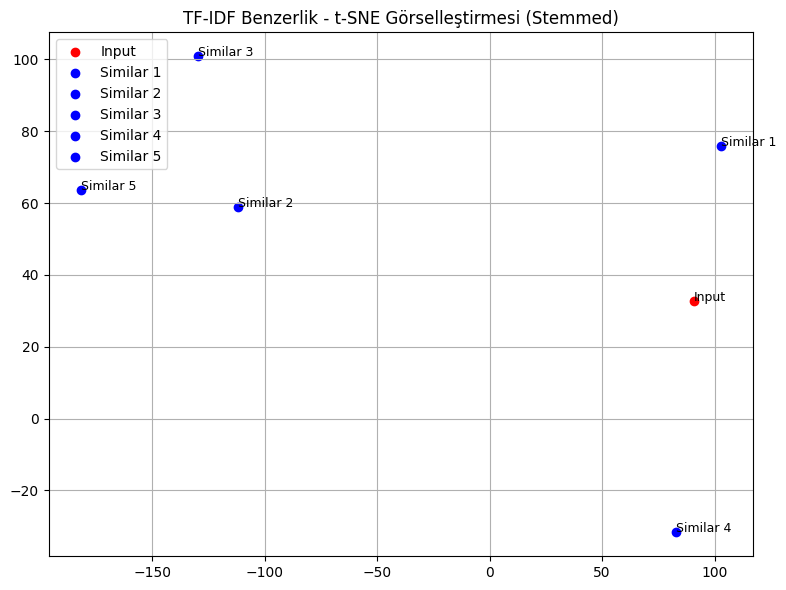

In [22]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini oku
df = pd.read_csv("fordstemmed.csv")

# 2. 'Tokens_Stemmed' s√ºtununu listeye √ßevir
texts = df["Tokens_Stemmed"].astype(str).apply(ast.literal_eval)

# 3. Listeyi d√ºz metne √ßevir
sentences = texts.apply(lambda tokens: " ".join(tokens))

# 4. TF-IDF vekt√∂rlemesi
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)

# 5. Giri≈ü metni index'i
input_index = 6
input_vector = tfidf_matrix[input_index]

# 6. Cosine similarity hesapla
similarities = cosine_similarity(input_vector, tfidf_matrix)[0]

# 7. En benzer 5 metni bul (kendisi hari√ß)
top_indices = similarities.argsort()[::-1]
top_indices = [i for i in top_indices if i != input_index][:5]
top_scores = similarities[top_indices]

# 8. Sonu√ßlarƒ± yazdƒ±r
print("TF-IDF (Stemmed) - En Benzer 5 Metin:")
for i, (index, score) in enumerate(zip(top_indices, top_scores)):
    print(f"{i+1}. Satƒ±r No: {index}, Benzerlik Skoru: {score:.4f}")

# 9. G√∂rselle≈ütirme i√ßin vekt√∂rleri se√ß (giri≈ü + ilk 5 benzer)
selected_indices = [input_index] + top_indices
selected_vectors = tfidf_matrix[selected_indices].toarray()

# 10. t-SNE ile 2D'ye indir (perplexity deƒüeri d√º≈ü√ºk)
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(selected_vectors)

# 11. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
colors = ['red'] + ['blue'] * 5
labels = ['Input'] + [f"Similar {i+1}" for i in range(5)]

for i, (vec, label) in enumerate(zip(reduced_vectors, labels)):
    plt.scatter(vec[0], vec[1], color=colors[i], label=label)
    plt.text(vec[0]+0.01, vec[1]+0.01, label, fontsize=9)

plt.title("TF-IDF Benzerlik - t-SNE G√∂rselle≈ütirmesi (Stemmed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Lemmatized TF-IDF Benzerliƒüi:**

TF-IDF (Lemmatized) - En Benzer 5 Metin:
1. Satƒ±r No: 12996, Benzerlik Skoru: 0.2155
2. Satƒ±r No: 665, Benzerlik Skoru: 0.1988
3. Satƒ±r No: 10159, Benzerlik Skoru: 0.1914
4. Satƒ±r No: 16047, Benzerlik Skoru: 0.1874
5. Satƒ±r No: 208, Benzerlik Skoru: 0.1811


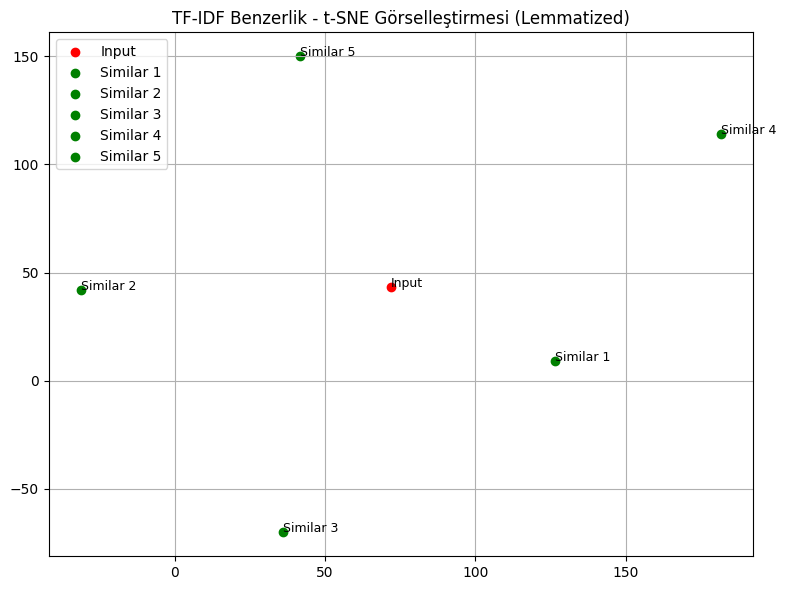

In [23]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini oku
df = pd.read_csv("fordlemmatized.csv")

# 2. 'Tokens_Lemmatized' s√ºtununu listeye √ßevir
texts = df["Tokens_Lemmatized"].astype(str).apply(ast.literal_eval)

# 3. Listeyi d√ºz metne √ßevir
sentences = texts.apply(lambda tokens: " ".join(tokens))

# 4. TF-IDF vekt√∂rlemesi
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)

# 5. Giri≈ü metni index'i (aynƒ±: 6. satƒ±r)
input_index = 6
input_vector = tfidf_matrix[input_index]

# 6. Cosine similarity hesapla
similarities = cosine_similarity(input_vector, tfidf_matrix)[0]

# 7. En benzer 5 metni bul (kendisi hari√ß)
top_indices = similarities.argsort()[::-1]
top_indices = [i for i in top_indices if i != input_index][:5]
top_scores = similarities[top_indices]

# 8. Sonu√ßlarƒ± yazdƒ±r
print("TF-IDF (Lemmatized) - En Benzer 5 Metin:")
for i, (index, score) in enumerate(zip(top_indices, top_scores)):
    print(f"{i+1}. Satƒ±r No: {index}, Benzerlik Skoru: {score:.4f}")

# 9. G√∂rselle≈ütirme i√ßin vekt√∂rleri se√ß (giri≈ü + ilk 5 benzer)
selected_indices = [input_index] + top_indices
selected_vectors = tfidf_matrix[selected_indices].toarray()

# 10. t-SNE ile 2D'ye indir (perplexity d√º≈ü√ºk)
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(selected_vectors)

# 11. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
colors = ['red'] + ['green'] * 5
labels = ['Input'] + [f"Similar {i+1}" for i in range(5)]

for i, (vec, label) in enumerate(zip(reduced_vectors, labels)):
    plt.scatter(vec[0], vec[1], color=colors[i], label=label)
    plt.text(vec[0]+0.01, vec[1]+0.01, label, fontsize=9)

plt.title("TF-IDF Benzerlik - t-SNE G√∂rselle≈ütirmesi (Lemmatized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**TF-IDF Vekt√∂rlerinin Kar≈üƒ±la≈ütƒ±rmasƒ±**

In [25]:
import pandas as pd

# Kullanƒ±cƒ±dan verilen puanlarƒ± gir (√∂rnek olarak yazƒ±lmƒ±≈ütƒ±r)
tfidf_stemmed_scores = [4, 2, 2, 4, 2]
tfidf_lemmatized_scores = [4, 2, 2, 5, 2]

# Ortalama puanlarƒ± hesapla
avg_stemmed = sum(tfidf_stemmed_scores) / len(tfidf_stemmed_scores)
avg_lemmatized = sum(tfidf_lemmatized_scores) / len(tfidf_lemmatized_scores)

# Verileri tablo haline getir
df_eval = pd.DataFrame({
    "Model": ["TF-IDF Stemmed", "TF-IDF Lemmatized"],
    "Puanlar": [tfidf_stemmed_scores, tfidf_lemmatized_scores],
    "Ortalama Puan": [avg_stemmed, avg_lemmatized]
})

# Sonucu yazdƒ±r
print("TF-IDF Modelleri Anlamsal Deƒüerlendirme Kar≈üƒ±la≈ütƒ±rmasƒ±:")
print(df_eval)

# Yorum
if avg_lemmatized > avg_stemmed:
    print("\nüëâ TF-IDF Lemmatized modeli daha anlamlƒ± sonu√ßlar √ºretmi≈ütir.")
elif avg_stemmed > avg_lemmatized:
    print("\nüëâ TF-IDF Stemmed modeli daha anlamlƒ± sonu√ßlar √ºretmi≈ütir.")
else:
    print("\nüëâ Her iki model de benzer ba≈üarƒ± g√∂stermi≈ütir.")


TF-IDF Modelleri Anlamsal Deƒüerlendirme Kar≈üƒ±la≈ütƒ±rmasƒ±:
               Model          Puanlar  Ortalama Puan
0     TF-IDF Stemmed  [4, 2, 2, 4, 2]            2.8
1  TF-IDF Lemmatized  [4, 2, 2, 5, 2]            3.0

üëâ TF-IDF Lemmatized modeli daha anlamlƒ± sonu√ßlar √ºretmi≈ütir.


##**G√ñREV-2B(Word2Vec Vekt√∂rle≈ütirme):**
**Se√ßilen giri≈ü metni: veri k√ºmesindeki 7. satƒ±r** ['lot', 'problem', 'ford', 'day', 'sensor', 'issu', 'cam', 'phaser', 'got', 'solenoid', 'problem']


**"word2vec_stemmed_cbow_w2_d100.model" Modeli i√ßin hesaplama:**

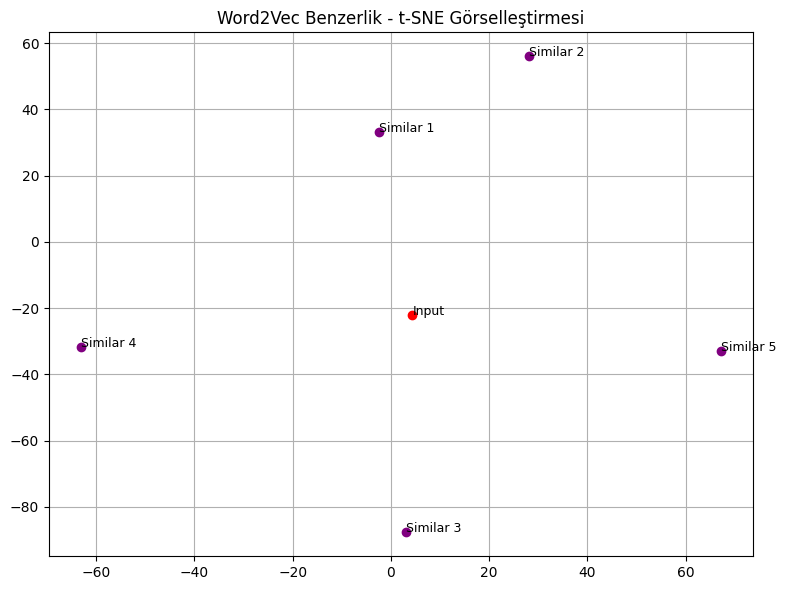


Word2Vec (Stemmed CBOW W2 D100) - En Benzer 5 Metin:
1. Satƒ±r No: 5758, Benzerlik Skoru: 0.9511
2. Satƒ±r No: 7205, Benzerlik Skoru: 0.9510
3. Satƒ±r No: 15045, Benzerlik Skoru: 0.9505
4. Satƒ±r No: 19322, Benzerlik Skoru: 0.9477
5. Satƒ±r No: 9308, Benzerlik Skoru: 0.9474


In [28]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordstemmed.csv")
df["Tokens_Stemmed"] = df["Tokens_Stemmed"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Stemmed"]

# 3. Word2Vec modelini y√ºkle (√∂rnek model)
model = Word2Vec.load("word2vec_stemmed_cbow_w2_d100.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Stemmed"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rleri g√∂rselle≈ütirme i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["purple"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))


# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec Benzerlik - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Stemmed CBOW W2 D100) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_stemmed_skipgram_w2_d100.model" Modeli i√ßin hesaplama:**

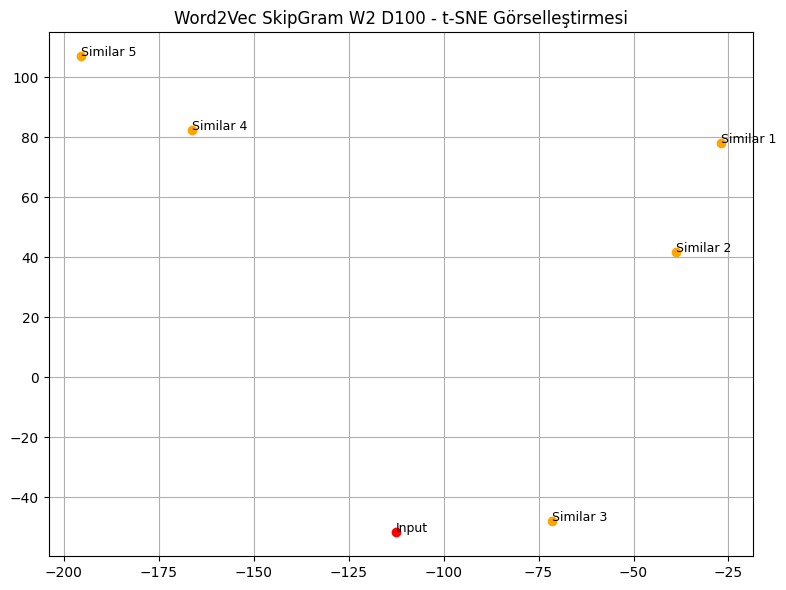


Word2Vec (Stemmed SkipGram W2 D100) - En Benzer 5 Metin:
1. Satƒ±r No: 14609, Benzerlik Skoru: 0.9786
2. Satƒ±r No: 10501, Benzerlik Skoru: 0.9783
3. Satƒ±r No: 5855, Benzerlik Skoru: 0.9783
4. Satƒ±r No: 7205, Benzerlik Skoru: 0.9782
5. Satƒ±r No: 5758, Benzerlik Skoru: 0.9771


In [29]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordstemmed.csv")
df["Tokens_Stemmed"] = df["Tokens_Stemmed"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Stemmed"]

# 3. Word2Vec modelini y√ºkle (≈üu model: SkipGram W2 D100)
model = Word2Vec.load("word2vec_stemmed_skipgram_w2_d100.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Stemmed"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["orange"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec SkipGram W2 D100 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Stemmed SkipGram W2 D100) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_stemmed_cbow_w4_d100.model" Modeli i√ßin hesaplama:**

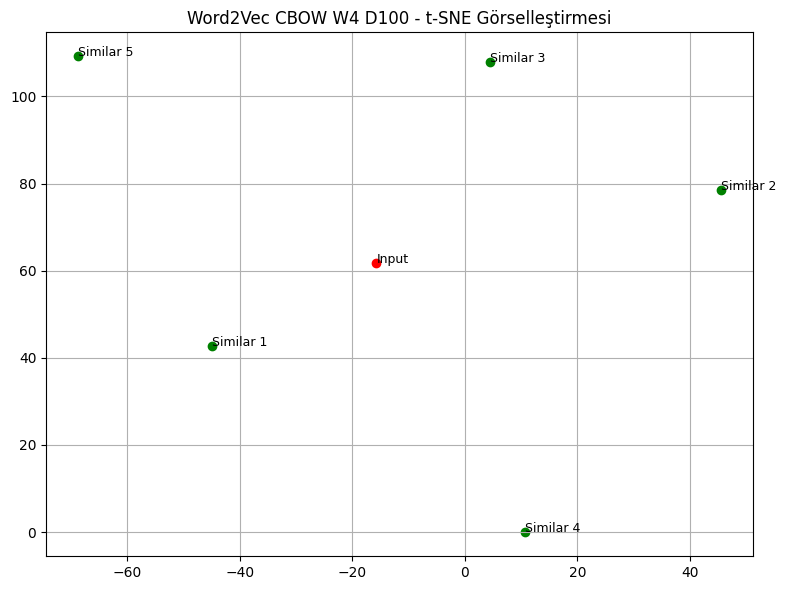


Word2Vec (Stemmed CBOW W4 D100) - En Benzer 5 Metin:
1. Satƒ±r No: 15045, Benzerlik Skoru: 0.9164
2. Satƒ±r No: 14586, Benzerlik Skoru: 0.9161
3. Satƒ±r No: 14692, Benzerlik Skoru: 0.9159
4. Satƒ±r No: 17332, Benzerlik Skoru: 0.9133
5. Satƒ±r No: 18451, Benzerlik Skoru: 0.9110


In [30]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordstemmed.csv")
df["Tokens_Stemmed"] = df["Tokens_Stemmed"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Stemmed"]

# 3. Word2Vec modelini y√ºkle (≈üu model: CBOW W4 D100)
model = Word2Vec.load("word2vec_stemmed_cbow_w4_d100.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Stemmed"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["green"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec CBOW W4 D100 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Stemmed CBOW W4 D100) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_stemmed_skipgram_w4_d100.model" Modeli i√ßin hesaplama:**

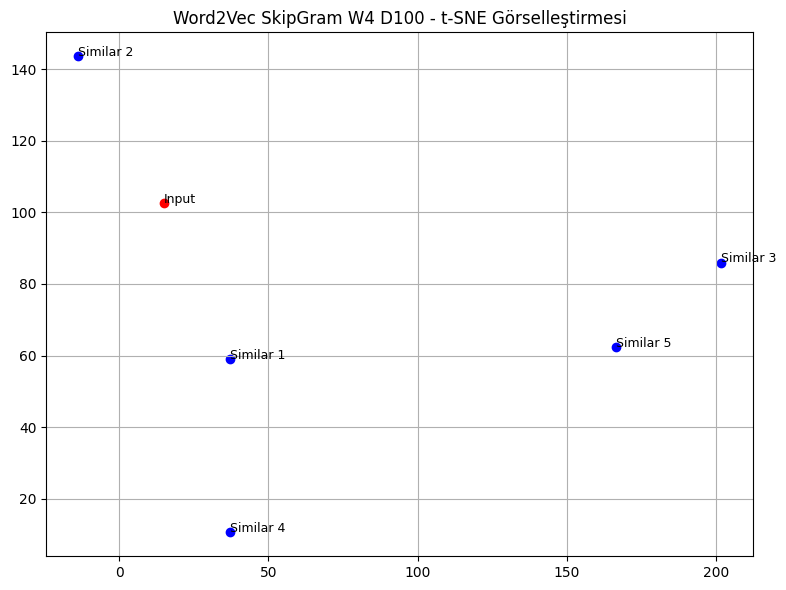


Word2Vec (Stemmed SkipGram W4 D100) - En Benzer 5 Metin:
1. Satƒ±r No: 14949, Benzerlik Skoru: 0.9768
2. Satƒ±r No: 5758, Benzerlik Skoru: 0.9757
3. Satƒ±r No: 14692, Benzerlik Skoru: 0.9749
4. Satƒ±r No: 4836, Benzerlik Skoru: 0.9738
5. Satƒ±r No: 14609, Benzerlik Skoru: 0.9731


In [31]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordstemmed.csv")
df["Tokens_Stemmed"] = df["Tokens_Stemmed"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Stemmed"]

# 3. Word2Vec modelini y√ºkle (≈üu model: SkipGram W4 D100)
model = Word2Vec.load("word2vec_stemmed_skipgram_w4_d100.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Stemmed"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["blue"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec SkipGram W4 D100 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Stemmed SkipGram W4 D100) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_stemmed_cbow_w2_d300.model" Modeli i√ßin hesaplama:**


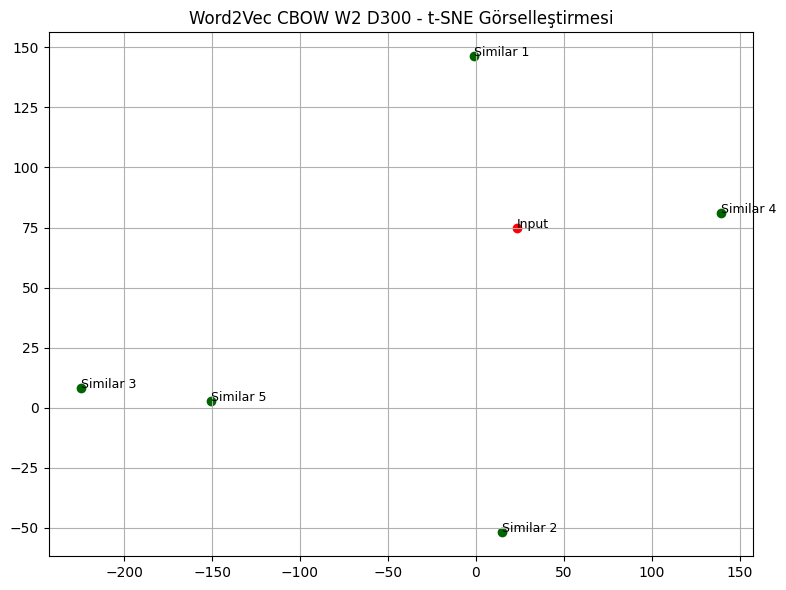


Word2Vec (Stemmed CBOW W2 D300) - En Benzer 5 Metin:
1. Satƒ±r No: 15045, Benzerlik Skoru: 0.9494
2. Satƒ±r No: 19322, Benzerlik Skoru: 0.9473
3. Satƒ±r No: 14586, Benzerlik Skoru: 0.9469
4. Satƒ±r No: 13687, Benzerlik Skoru: 0.9468
5. Satƒ±r No: 14609, Benzerlik Skoru: 0.9462


In [32]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordstemmed.csv")
df["Tokens_Stemmed"] = df["Tokens_Stemmed"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Stemmed"]

# 3. Word2Vec modelini y√ºkle (≈üu model: CBOW W2 D300)
model = Word2Vec.load("word2vec_stemmed_cbow_w2_d300.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Stemmed"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["darkgreen"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec CBOW W2 D300 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Stemmed CBOW W2 D300) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_stemmed_skipgram_w2_d300.model" Modeli i√ßin hesaplama:**


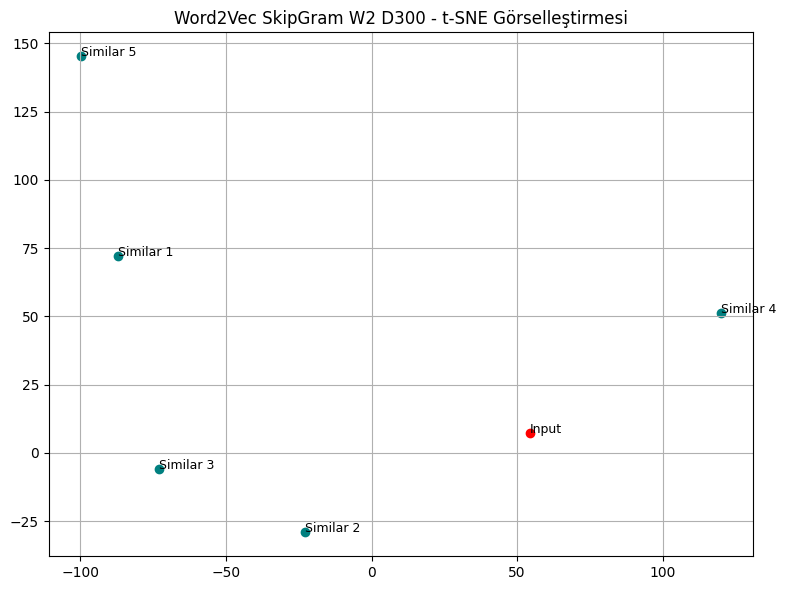


Word2Vec (Stemmed SkipGram W2 D300) - En Benzer 5 Metin:
1. Satƒ±r No: 14609, Benzerlik Skoru: 0.9731
2. Satƒ±r No: 7205, Benzerlik Skoru: 0.9714
3. Satƒ±r No: 13687, Benzerlik Skoru: 0.9713
4. Satƒ±r No: 14911, Benzerlik Skoru: 0.9713
5. Satƒ±r No: 14692, Benzerlik Skoru: 0.9711


In [33]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordstemmed.csv")
df["Tokens_Stemmed"] = df["Tokens_Stemmed"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Stemmed"]

# 3. Word2Vec modelini y√ºkle (≈üu model: SkipGram W2 D300)
model = Word2Vec.load("word2vec_stemmed_skipgram_w2_d300.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Stemmed"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["teal"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec SkipGram W2 D300 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Stemmed SkipGram W2 D300) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_stemmed_cbow_w4_d300.model" Modeli i√ßin hesaplama:**


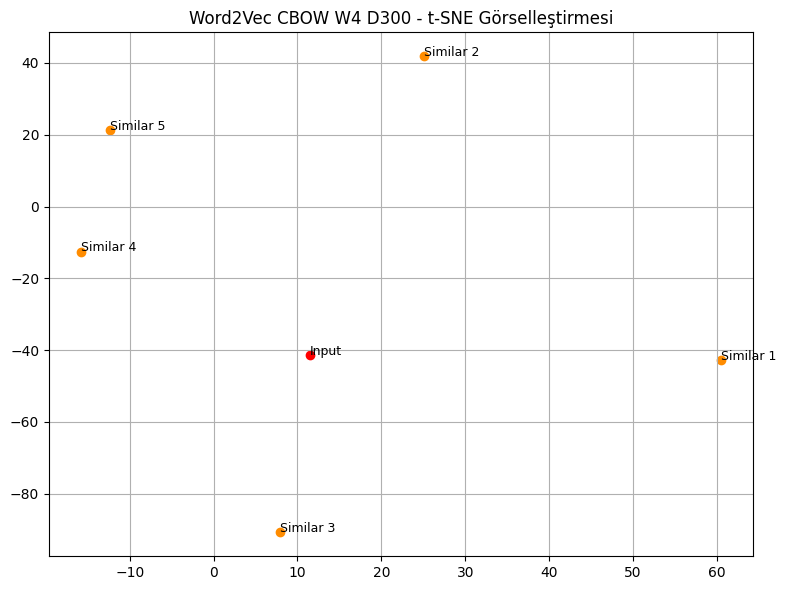


Word2Vec (Stemmed CBOW W4 D300) - En Benzer 5 Metin:
1. Satƒ±r No: 14692, Benzerlik Skoru: 0.9203
2. Satƒ±r No: 14609, Benzerlik Skoru: 0.9124
3. Satƒ±r No: 14586, Benzerlik Skoru: 0.9121
4. Satƒ±r No: 15045, Benzerlik Skoru: 0.9099
5. Satƒ±r No: 10501, Benzerlik Skoru: 0.9098


In [34]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordstemmed.csv")
df["Tokens_Stemmed"] = df["Tokens_Stemmed"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Stemmed"]

# 3. Word2Vec modelini y√ºkle (CBOW W4 D300)
model = Word2Vec.load("word2vec_stemmed_cbow_w4_d300.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Stemmed"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["darkorange"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec CBOW W4 D300 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Stemmed CBOW W4 D300) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_stemmed_skipgram_w4_d300.model" Modeli i√ßin hesaplama:**


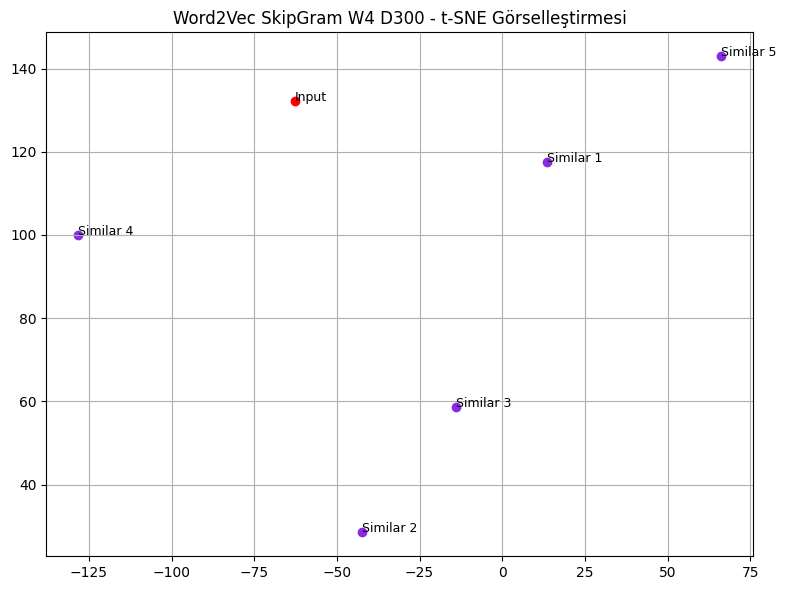


Word2Vec (Stemmed SkipGram W4 D300) - En Benzer 5 Metin:
1. Satƒ±r No: 14609, Benzerlik Skoru: 0.9676
2. Satƒ±r No: 5758, Benzerlik Skoru: 0.9657
3. Satƒ±r No: 7205, Benzerlik Skoru: 0.9635
4. Satƒ±r No: 2636, Benzerlik Skoru: 0.9633
5. Satƒ±r No: 14692, Benzerlik Skoru: 0.9633


In [35]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordstemmed.csv")
df["Tokens_Stemmed"] = df["Tokens_Stemmed"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Stemmed"]

# 3. Word2Vec modelini y√ºkle (SkipGram W4 D300)
model = Word2Vec.load("word2vec_stemmed_skipgram_w4_d300.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Stemmed"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["blueviolet"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec SkipGram W4 D300 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Stemmed SkipGram W4 D300) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_lemmatized_cbow_w2_d100.model" Modeli i√ßin hesaplama:**


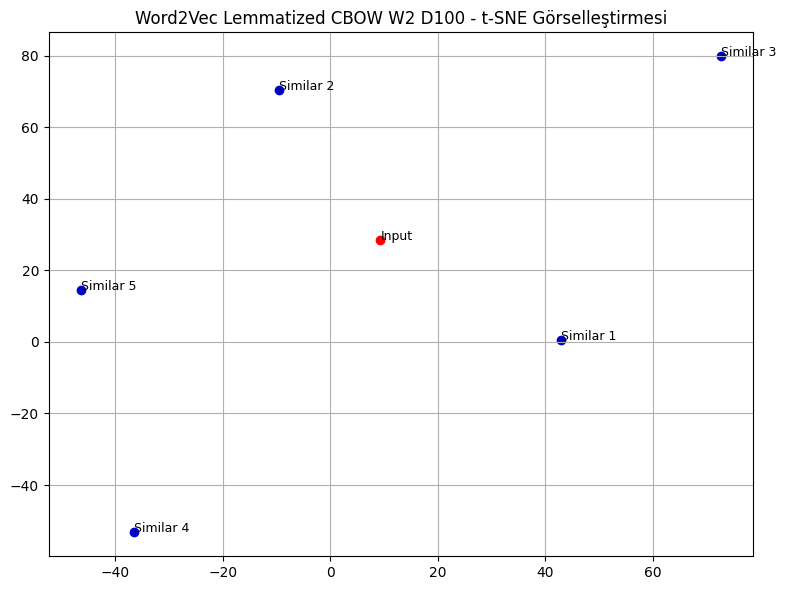


Word2Vec (Lemmatized CBOW W2 D100) - En Benzer 5 Metin:
1. Satƒ±r No: 8800, Benzerlik Skoru: 0.9522
2. Satƒ±r No: 5758, Benzerlik Skoru: 0.9521
3. Satƒ±r No: 17008, Benzerlik Skoru: 0.9519
4. Satƒ±r No: 19322, Benzerlik Skoru: 0.9505
5. Satƒ±r No: 14609, Benzerlik Skoru: 0.9501


In [36]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordlemmatized.csv")
df["Tokens_Lemmatized"] = df["Tokens_Lemmatized"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Lemmatized"]

# 3. Word2Vec modelini y√ºkle (CBOW W2 D100)
model = Word2Vec.load("word2vec_lemmatized_cbow_w2_d100.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Lemmatized"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["mediumblue"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec Lemmatized CBOW W2 D100 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Lemmatized CBOW W2 D100) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_lemmatized_skipgram_w2_d100.model" Modeli i√ßin hesaplama:**


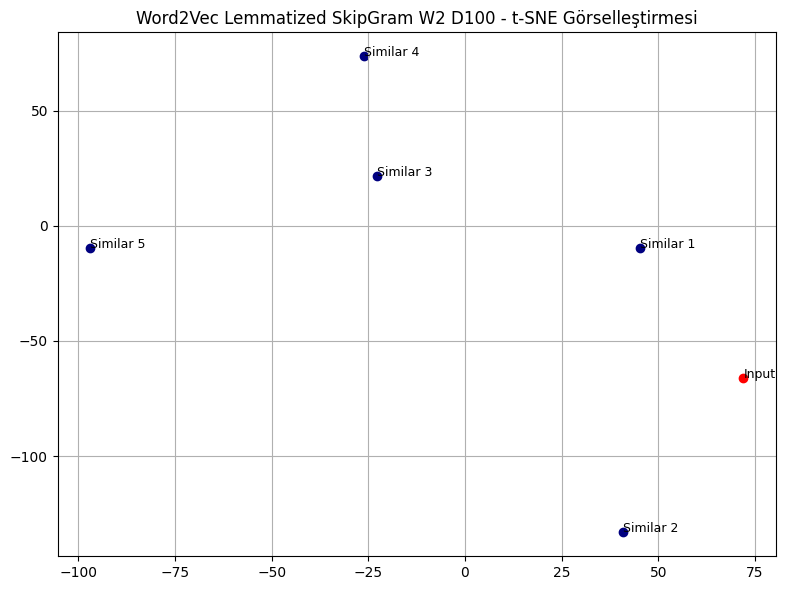


Word2Vec (Lemmatized SkipGram W2 D100) - En Benzer 5 Metin:
1. Satƒ±r No: 7205, Benzerlik Skoru: 0.9785
2. Satƒ±r No: 10330, Benzerlik Skoru: 0.9762
3. Satƒ±r No: 14609, Benzerlik Skoru: 0.9762
4. Satƒ±r No: 15148, Benzerlik Skoru: 0.9759
5. Satƒ±r No: 19322, Benzerlik Skoru: 0.9752


In [37]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordlemmatized.csv")
df["Tokens_Lemmatized"] = df["Tokens_Lemmatized"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Lemmatized"]

# 3. Word2Vec modelini y√ºkle (SkipGram W2 D100)
model = Word2Vec.load("word2vec_lemmatized_skipgram_w2_d100.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Lemmatized"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["navy"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec Lemmatized SkipGram W2 D100 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Lemmatized SkipGram W2 D100) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_lemmatized_cbow_w4_d100.model" Modeli i√ßin hesaplama:**


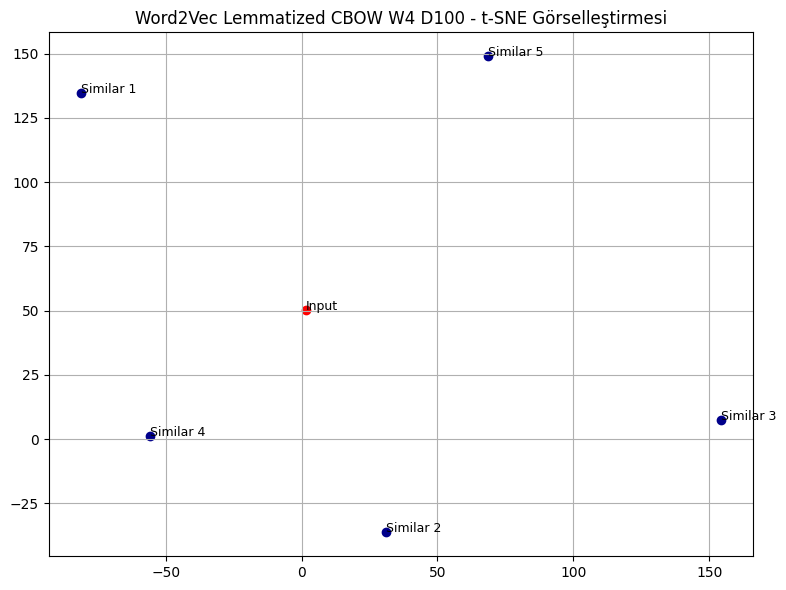


Word2Vec (Lemmatized CBOW W4 D100) - En Benzer 5 Metin:
1. Satƒ±r No: 3015, Benzerlik Skoru: 0.9206
2. Satƒ±r No: 14609, Benzerlik Skoru: 0.9205
3. Satƒ±r No: 19322, Benzerlik Skoru: 0.9184
4. Satƒ±r No: 14771, Benzerlik Skoru: 0.9179
5. Satƒ±r No: 17008, Benzerlik Skoru: 0.9149


In [38]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordlemmatized.csv")
df["Tokens_Lemmatized"] = df["Tokens_Lemmatized"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Lemmatized"]

# 3. Word2Vec modelini y√ºkle (CBOW W4 D100)
model = Word2Vec.load("word2vec_lemmatized_cbow_w4_d100.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Lemmatized"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["darkblue"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec Lemmatized CBOW W4 D100 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Lemmatized CBOW W4 D100) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_lemmatized_skipgram_w4_d100.model" Modeli i√ßin hesaplama:**


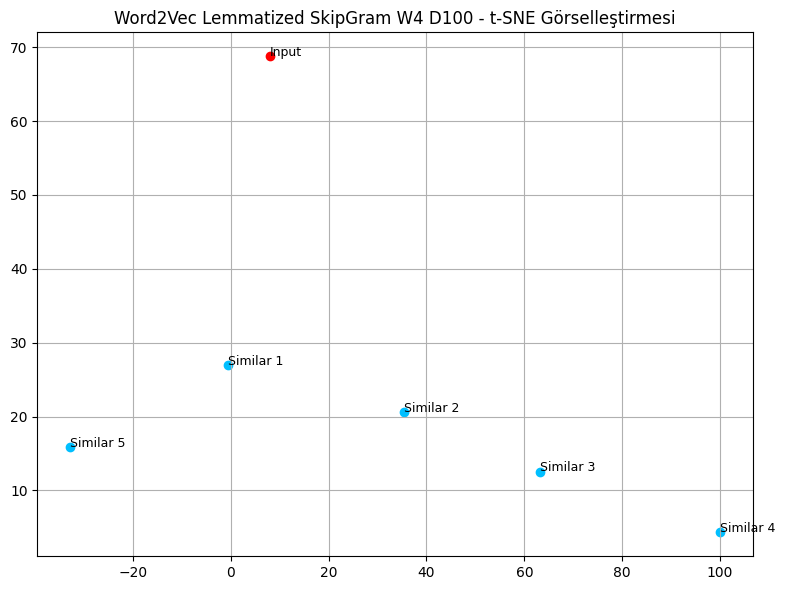


Word2Vec (Lemmatized SkipGram W4 D100) - En Benzer 5 Metin:
1. Satƒ±r No: 14609, Benzerlik Skoru: 0.9710
2. Satƒ±r No: 7205, Benzerlik Skoru: 0.9696
3. Satƒ±r No: 5758, Benzerlik Skoru: 0.9683
4. Satƒ±r No: 1272, Benzerlik Skoru: 0.9681
5. Satƒ±r No: 10330, Benzerlik Skoru: 0.9679


In [39]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordlemmatized.csv")
df["Tokens_Lemmatized"] = df["Tokens_Lemmatized"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Lemmatized"]

# 3. Word2Vec modelini y√ºkle (SkipGram W4 D100)
model = Word2Vec.load("word2vec_lemmatized_skipgram_w4_d100.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Lemmatized"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["deepskyblue"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec Lemmatized SkipGram W4 D100 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Lemmatized SkipGram W4 D100) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_lemmatized_cbow_w2_d300.model" Modeli i√ßin hesaplama:**


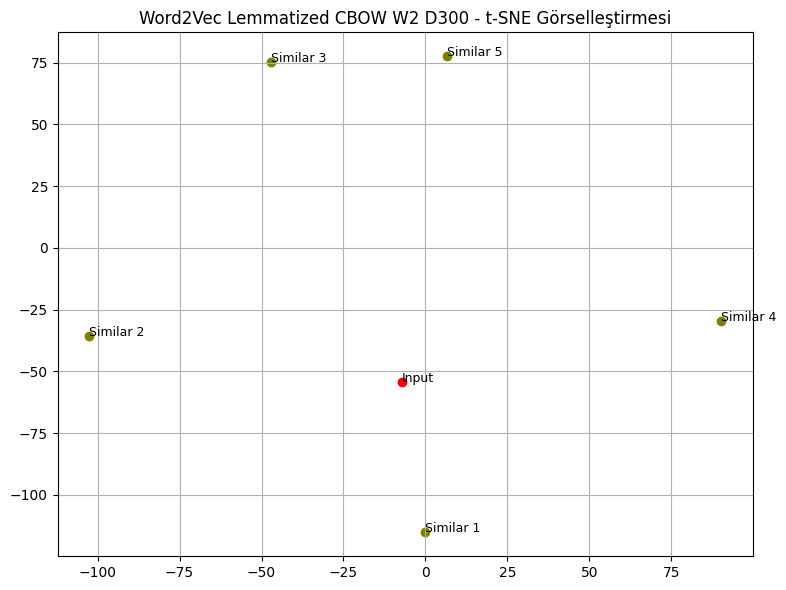


Word2Vec (Lemmatized CBOW W2 D300) - En Benzer 5 Metin:
1. Satƒ±r No: 8800, Benzerlik Skoru: 0.9518
2. Satƒ±r No: 3015, Benzerlik Skoru: 0.9510
3. Satƒ±r No: 5758, Benzerlik Skoru: 0.9509
4. Satƒ±r No: 17008, Benzerlik Skoru: 0.9490
5. Satƒ±r No: 7205, Benzerlik Skoru: 0.9485


In [40]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordlemmatized.csv")
df["Tokens_Lemmatized"] = df["Tokens_Lemmatized"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Lemmatized"]

# 3. Word2Vec modelini y√ºkle (CBOW W2 D300)
model = Word2Vec.load("word2vec_lemmatized_cbow_w2_d300.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Lemmatized"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["olive"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec Lemmatized CBOW W2 D300 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Lemmatized CBOW W2 D300) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_lemmatized_skipgram_w2_d300.model" Modeli i√ßin hesaplama:**


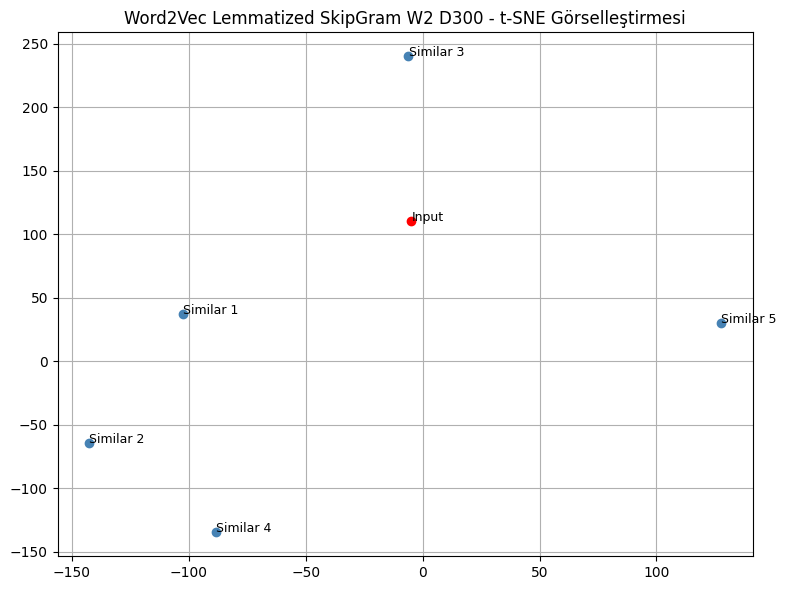


Word2Vec (Lemmatized SkipGram W2 D300) - En Benzer 5 Metin:
1. Satƒ±r No: 7205, Benzerlik Skoru: 0.9726
2. Satƒ±r No: 14609, Benzerlik Skoru: 0.9709
3. Satƒ±r No: 14911, Benzerlik Skoru: 0.9693
4. Satƒ±r No: 14771, Benzerlik Skoru: 0.9693
5. Satƒ±r No: 5515, Benzerlik Skoru: 0.9691


In [41]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordlemmatized.csv")
df["Tokens_Lemmatized"] = df["Tokens_Lemmatized"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Lemmatized"]

# 3. Word2Vec modelini y√ºkle (SkipGram W2 D300)
model = Word2Vec.load("word2vec_lemmatized_skipgram_w2_d300.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Lemmatized"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["steelblue"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec Lemmatized SkipGram W2 D300 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Lemmatized SkipGram W2 D300) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_lemmatized_cbow_w4_d300.model" Modeli i√ßin hesaplama:**


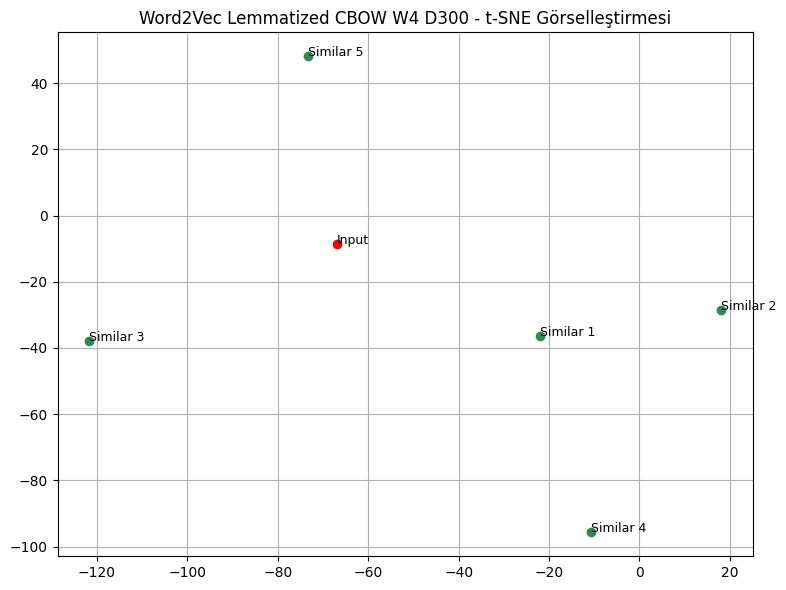


Word2Vec (Lemmatized CBOW W4 D300) - En Benzer 5 Metin:
1. Satƒ±r No: 14609, Benzerlik Skoru: 0.9171
2. Satƒ±r No: 14692, Benzerlik Skoru: 0.9157
3. Satƒ±r No: 19322, Benzerlik Skoru: 0.9135
4. Satƒ±r No: 14586, Benzerlik Skoru: 0.9126
5. Satƒ±r No: 3015, Benzerlik Skoru: 0.9117


In [42]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordlemmatized.csv")
df["Tokens_Lemmatized"] = df["Tokens_Lemmatized"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Lemmatized"]

# 3. Word2Vec modelini y√ºkle (CBOW W4 D300)
model = Word2Vec.load("word2vec_lemmatized_cbow_w4_d300.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Lemmatized"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["seagreen"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec Lemmatized CBOW W4 D300 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Lemmatized CBOW W4 D300) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


**"word2vec_lemmatized_skipgram_w4_d300.model" Modeli i√ßin hesaplama:**


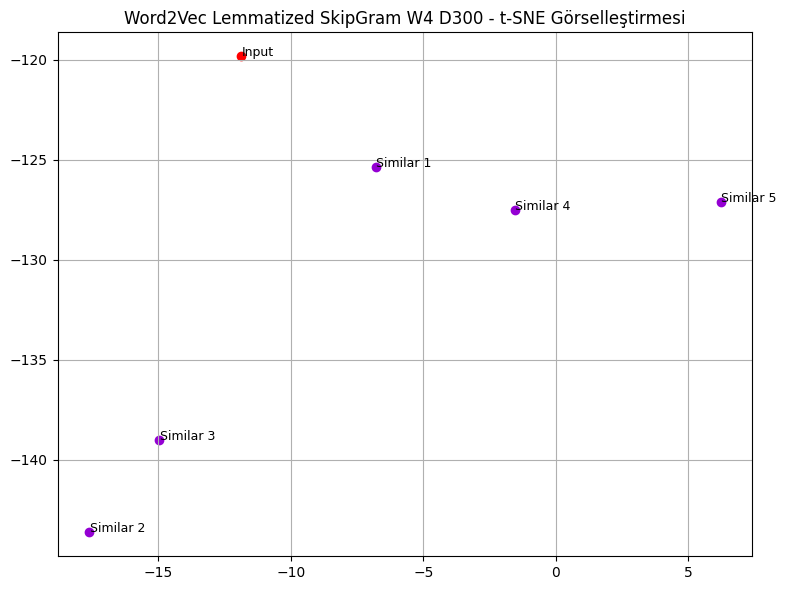


Word2Vec (Lemmatized SkipGram W4 D300) - En Benzer 5 Metin:
1. Satƒ±r No: 14609, Benzerlik Skoru: 0.9629
2. Satƒ±r No: 5758, Benzerlik Skoru: 0.9613
3. Satƒ±r No: 7205, Benzerlik Skoru: 0.9610
4. Satƒ±r No: 10501, Benzerlik Skoru: 0.9606
5. Satƒ±r No: 14911, Benzerlik Skoru: 0.9595


In [43]:
import pandas as pd
import ast
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Veri setini y√ºkle
df = pd.read_csv("fordlemmatized.csv")
df["Tokens_Lemmatized"] = df["Tokens_Lemmatized"].astype(str).apply(ast.literal_eval)

# 2. Giri≈ü metni (satƒ±r 6)
input_index = 6
input_tokens = df.loc[input_index, "Tokens_Lemmatized"]

# 3. Word2Vec modelini y√ºkle (SkipGram W4 D300)
model = Word2Vec.load("word2vec_lemmatized_skipgram_w4_d300.model")

# 4. Ortalama vekt√∂r√º hesaplama fonksiyonu
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 5. Giri≈ü metni i√ßin ortalama vekt√∂r
input_vec = get_avg_vector(input_tokens, model).reshape(1, -1)

# 6. T√ºm metinler i√ßin benzerlikleri hesapla
similarities = []
for idx, row in df.iterrows():
    if idx == input_index:
        continue
    avg_vec = get_avg_vector(row["Tokens_Lemmatized"], model).reshape(1, -1)
    sim = cosine_similarity(input_vec, avg_vec)[0][0]
    similarities.append((idx, sim, avg_vec))

# 7. En benzer 5 sonucu sƒ±rala
top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

# 8. Giri≈ü + top5 vekt√∂rlerini t-SNE i√ßin hazƒ±rla
selected_vectors = [input_vec[0]] + [item[2][0] for item in top5]
labels = ["Input"] + [f"Similar {i+1}" for i in range(5)]
colors = ["red"] + ["darkviolet"] * 5

# 9. t-SNE ile 2 boyuta indir
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_vectors = tsne.fit_transform(np.array(selected_vectors))

# 10. G√∂rselle≈ütir
plt.figure(figsize=(8, 6))
for i, vec in enumerate(reduced_vectors):
    plt.scatter(vec[0], vec[1], color=colors[i])
    plt.text(vec[0]+0.01, vec[1]+0.01, labels[i], fontsize=9)

plt.title("Word2Vec Lemmatized SkipGram W4 D300 - t-SNE G√∂rselle≈ütirmesi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Benzerlik skorlarƒ±nƒ± yazdƒ±r
print("\nWord2Vec (Lemmatized SkipGram W4 D300) - En Benzer 5 Metin:")
for i, (idx, score, _) in enumerate(top5, 1):
    print(f"{i}. Satƒ±r No: {idx}, Benzerlik Skoru: {score:.4f}")


#**Word2Vec Jaccard Benzerlik Matrisi**

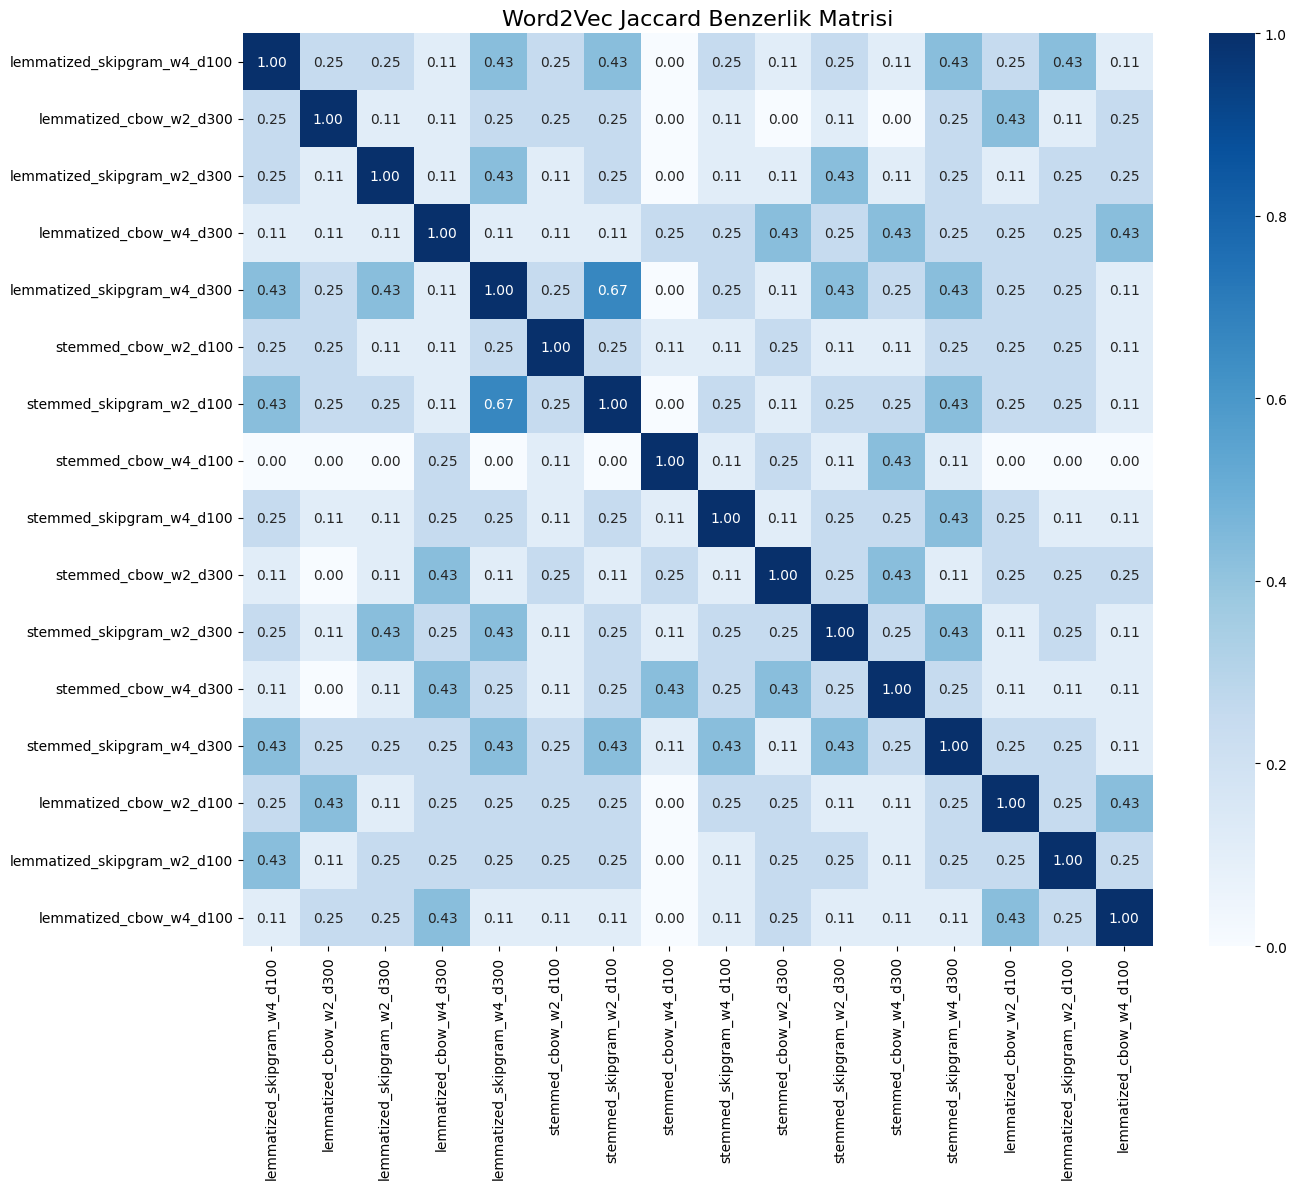

In [44]:
import pandas as pd

# Model isimleri ve satƒ±r listeleri (senin verdiƒüin ekran g√∂r√ºnt√ºlerinden √ßƒ±karƒ±lmƒ±≈ütƒ±r)
model_to_indices = {
    "lemmatized_skipgram_w4_d100": [14609, 7205, 5758, 1272, 10330],
    "lemmatized_cbow_w2_d300": [8800, 3015, 5758, 17008, 7205],
    "lemmatized_skipgram_w2_d300": [7205, 14609, 14911, 14771, 5515],
    "lemmatized_cbow_w4_d300": [14609, 14692, 19322, 14586, 3015],
    "lemmatized_skipgram_w4_d300": [14609, 5758, 7205, 10501, 14911],
    "stemmed_cbow_w2_d100": [5758, 7205, 15045, 19322, 9308],
    "stemmed_skipgram_w2_d100": [14609, 10501, 5855, 7205, 5758],
    "stemmed_cbow_w4_d100": [15045, 14586, 14692, 17332, 18451],
    "stemmed_skipgram_w4_d100": [14949, 5758, 14692, 4836, 14609],
    "stemmed_cbow_w2_d300": [15045, 19322, 14586, 13687, 14609],
    "stemmed_skipgram_w2_d300": [14609, 7205, 13687, 14911, 14692],
    "stemmed_cbow_w4_d300": [14692, 14609, 14586, 15045, 10501],
    "stemmed_skipgram_w4_d300": [14609, 5758, 7205, 2636, 14692],
    "lemmatized_cbow_w2_d100": [8800, 5758, 17008, 19322, 14609],
    "lemmatized_skipgram_w2_d100": [7205, 10330, 14609, 15148, 19322],
    "lemmatized_cbow_w4_d100": [3015, 14609, 19322, 14771, 17008],
}

# Jaccard hesaplama fonksiyonu
def jaccard_similarity(set1, set2):
    intersection = len(set(set1) & set(set2))
    union = len(set(set1) | set(set2))
    return intersection / union

# Matris olu≈ütur
model_names = list(model_to_indices.keys())
jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names, dtype=float)

for i in model_names:
    for j in model_names:
        jaccard_matrix.loc[i, j] = jaccard_similarity(model_to_indices[i], model_to_indices[j])

# Matris CSV olarak kaydet
jaccard_matrix.to_csv("jaccard_matrix.csv", index=True)

# Tabloyu g√∂ster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))
sns.heatmap(jaccard_matrix.astype(float), annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Word2Vec Jaccard Benzerlik Matrisi", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#**En Y√ºksek Jaccard Benzerliƒüine Sahip Model √áiftleri**

In [45]:
import pandas as pd
from itertools import combinations

# Daha √∂nce olu≈üturulan jaccard_matrix.csv dosyasƒ±nƒ± y√ºkleyelim (ya da √∂nceki DataFrame'i kullanabilirsin)
jaccard_matrix = pd.read_csv("jaccard_matrix.csv", index_col=0)

# En y√ºksek benzerlikli model √ßiftlerini bulalƒ±m (kendisiyle kar≈üƒ±la≈ütƒ±rma hari√ß)
results = []

# T√ºm benzersiz √ßiftleri sƒ±rayla kontrol et
for model1, model2 in combinations(jaccard_matrix.index, 2):
    score = jaccard_matrix.loc[model1, model2]
    results.append((model1, model2, score))

# Skora g√∂re azalan ≈üekilde sƒ±rala
sorted_results = sorted(results, key=lambda x: x[2], reverse=True)

# ƒ∞lk 10 en y√ºksek skoru g√∂sterelim
top_n = 10  # ƒ∞stersen daha fazlasƒ±nƒ± alabilirsin
print(f"üîù En Y√ºksek {top_n} Jaccard Benzerliƒüine Sahip Model √áiftleri:\n")
for i in range(top_n):
    m1, m2, score = sorted_results[i]
    print(f"{i+1}. {m1} ‚Üî {m2} ‚Üí Jaccard Skoru: {score:.3f}")


üîù En Y√ºksek 10 Jaccard Benzerliƒüine Sahip Model √áiftleri:

1. lemmatized_skipgram_w4_d300 ‚Üî stemmed_skipgram_w2_d100 ‚Üí Jaccard Skoru: 0.667
2. lemmatized_skipgram_w4_d100 ‚Üî lemmatized_skipgram_w4_d300 ‚Üí Jaccard Skoru: 0.429
3. lemmatized_skipgram_w4_d100 ‚Üî stemmed_skipgram_w2_d100 ‚Üí Jaccard Skoru: 0.429
4. lemmatized_skipgram_w4_d100 ‚Üî stemmed_skipgram_w4_d300 ‚Üí Jaccard Skoru: 0.429
5. lemmatized_skipgram_w4_d100 ‚Üî lemmatized_skipgram_w2_d100 ‚Üí Jaccard Skoru: 0.429
6. lemmatized_cbow_w2_d300 ‚Üî lemmatized_cbow_w2_d100 ‚Üí Jaccard Skoru: 0.429
7. lemmatized_skipgram_w2_d300 ‚Üî lemmatized_skipgram_w4_d300 ‚Üí Jaccard Skoru: 0.429
8. lemmatized_skipgram_w2_d300 ‚Üî stemmed_skipgram_w2_d300 ‚Üí Jaccard Skoru: 0.429
9. lemmatized_cbow_w4_d300 ‚Üî stemmed_cbow_w2_d300 ‚Üí Jaccard Skoru: 0.429
10. lemmatized_cbow_w4_d300 ‚Üî stemmed_cbow_w4_d300 ‚Üí Jaccard Skoru: 0.429


#**Word2Vec Anlamsal Deƒüerlendirme Tablosu:**



In [46]:
# 1. Gerekli k√ºt√ºphaneleri y√ºkle
import pandas as pd

# 2. Google Colab'a dosya y√ºkleme aray√ºz√ºn√º a√ß
from google.colab import files
uploaded = files.upload()

# 3. Y√ºklenen dosyanƒ±n adƒ±nƒ± girerek oku (√∂rneƒüin: jaccard_matrix.csv)
df = pd.read_csv("Word2Vec_Anlamsal_De_erlendirme_Tablosu.csv")

# 4. Tabloyu g√∂ster
from IPython.display import display
display(df)


Unnamed: 0                        Model          Puanlar  Ortalama Puan
0            2  lemmatized_skipgram_w2_d300  [5, 5, 4, 4, 3]            4.2
1            4  lemmatized_skipgram_w4_d300  [5, 4, 4, 3, 4]            4.0
2           10     stemmed_skipgram_w2_d300  [5, 4, 3, 4, 4]            4.0
3           14  lemmatized_skipgram_w2_d100  [5, 4, 5, 3, 3]            4.0
4            0  lemmatized_skipgram_w4_d100  [5, 4, 4, 2, 4]            3.8
5            6     stemmed_skipgram_w2_d100  [5, 4, 2, 4, 4]            3.8
6            8     stemmed_skipgram_w4_d100  [4, 4, 4, 3, 4]            3.8
7           12     stemmed_skipgram_w4_d300  [5, 4, 4, 2, 4]            3.8
8            1      lemmatized_cbow_w2_d300  [3, 3, 4, 3, 3]            3.2
9           13      lemmatized_cbow_w2_d100  [3, 4, 3, 3, 3]            3.2
10          15      lemmatized_cbow_w4_d100  [3, 4, 3, 3, 3]            3.2
11           3      lemmatized_cbow_w4_d300  [4, 4, 2, 2, 3]            3.0
12           5         stemmed_cbow_w2_d100  [4, 4, 3, 2, 2]            3.0
13           9         stemmed_cbow_w2_d300  [4, 3, 3, 2, 3]            3.0
14          11         stemmed_cbow_w4_d300  [4, 3, 3, 3, 2]            3.0
15           7         stemmed_cbow_w4_d100  [3, 3, 3, 2, 2]            2.6